In [1]:
import torch
import gymnasium as gym
import random
import mylab
import matplotlib.pyplot as plt
import torch.nn.functional as F
import numpy as np

In [2]:
class PolicyNet(torch.nn.Module):
    def __init__(self,state_dim,hidden_dim,action_dim):
        super(PolicyNet,self).__init__()
        self.fc1=torch.nn.Linear(state_dim,hidden_dim)
        self.fc2=torch.nn.Linear(hidden_dim,action_dim)
        self.softmax=torch.nn.Softmax(dim=1)
    def forward(self,x):
        x=self.softmax(self.fc2(torch.relu(self.fc1(x))))
        return x

In [3]:
class ValueNet(torch.nn.Module):
    def __init__(self,state_dim,hidden_dim):
        super(ValueNet,self).__init__()
        self.fc1=torch.nn.Linear(state_dim,hidden_dim)
        self.fc2=torch.nn.Linear(hidden_dim,1)
    def forward(self,x):
        x=torch.relu(self.fc1(x))
        x=self.fc2(x)
        return x

In [16]:
class ActorCritic:    
    def __init__(self,state_dim,hidden_dim,action_dim,act_lr,cri_lr,gamma,device):
        self.actor=PolicyNet(state_dim,hidden_dim,action_dim).to(device)
        self.critic=ValueNet(state_dim,hidden_dim).to(device)
        self.actor_optimizer=torch.optim.Adam(self.actor.parameters(),lr=act_lr)
        self.critic_optimizer=torch.optim.Adam(self.critic.parameters(),lr=cri_lr)
        self.device=device
        self.gamma=gamma
    def take_action(self,state):
        state=torch.tensor([state],dtype=torch.float).to(self.device)
        probs=self.actor(state)
        action_dist=torch.distributions.Categorical(probs)
        action=action_dist.sample()
        return action.item()
    def update(self,transition_dist):
        states=torch.tensor(transition_dist["states"],dtype=torch.float).to(self.device)
        print(states.shape)
        rewards=torch.tensor(transition_dist["rewards"],dtype=torch.float).view(-1,1).to(self.device)
        dones=torch.tensor(transition_dist["dones"],dtype=torch.float).view(-1,1).to(self.device)
        actions=torch.tensor(transition_dist["actions"]).view(-1,1).to(self.device)
        next_states=torch.tensor(transition_dist["next_states"],dtype=torch.float).to(self.device)
        Td_target=rewards+self.critic(next_states)*self.gamma*(1-dones)
        Td_error=Td_target-self.critic(states)
        log_probs=torch.log(self.actor(states).gather(1,actions))
        act_loss=torch.mean(-log_probs*Td_error.detach())
        critic_loss=torch.mean(torch.nn.functional.mse_loss(self.critic(states),Td_target))
        self.actor_optimizer.zero_grad()
        self.critic_optimizer.zero_grad()
        act_loss.backward()
        critic_loss.backward()
        self.actor_optimizer.step()
        self.critic_optimizer.step()
        

In [17]:
act_lr=1e-3
cri_lr=1e-2
env_name="CartPole-v1"
env=gym.make(env_name)
state_dim=env.observation_space.shape[0]
hidden_dim=128
num_episodes=2000
action_dim=env.action_space.n
torch.manual_seed(0)
gamma=0.98

device=torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
agent=ActorCritic(state_dim,hidden_dim,action_dim,act_lr,cri_lr,gamma,device)
return_list =mylab.train_on_policy_agent(env, agent, num_episodes)


第0轮:   8%|██▉                                | 17/200 [00:00<00:02, 80.90it/s, episode=10, return=18.700]

torch.Size([16, 4])
torch.Size([15, 4])
torch.Size([10, 4])
torch.Size([22, 4])
torch.Size([26, 4])
torch.Size([20, 4])
torch.Size([9, 4])
torch.Size([26, 4])
torch.Size([24, 4])
torch.Size([19, 4])
torch.Size([9, 4])
torch.Size([13, 4])
torch.Size([22, 4])
torch.Size([8, 4])
torch.Size([20, 4])
torch.Size([34, 4])
torch.Size([13, 4])


第0轮:  14%|█████                              | 29/200 [00:00<00:02, 79.48it/s, episode=30, return=18.900]

torch.Size([28, 4])
torch.Size([15, 4])
torch.Size([19, 4])
torch.Size([11, 4])
torch.Size([12, 4])
torch.Size([11, 4])
torch.Size([18, 4])
torch.Size([25, 4])
torch.Size([39, 4])
torch.Size([24, 4])
torch.Size([10, 4])
torch.Size([25, 4])
torch.Size([14, 4])
torch.Size([12, 4])
torch.Size([14, 4])
torch.Size([22, 4])
torch.Size([19, 4])


第0轮:  24%|████████▌                          | 49/200 [00:00<00:01, 81.64it/s, episode=50, return=16.200]

torch.Size([19, 4])
torch.Size([16, 4])
torch.Size([11, 4])
torch.Size([31, 4])
torch.Size([15, 4])
torch.Size([28, 4])
torch.Size([16, 4])
torch.Size([14, 4])
torch.Size([18, 4])
torch.Size([15, 4])
torch.Size([18, 4])
torch.Size([12, 4])
torch.Size([12, 4])
torch.Size([27, 4])
torch.Size([17, 4])
torch.Size([13, 4])
torch.Size([17, 4])
torch.Size([12, 4])


第0轮:  31%|██████████▊                        | 62/200 [00:00<00:01, 84.12it/s, episode=60, return=17.200]

torch.Size([15, 4])
torch.Size([10, 4])
torch.Size([22, 4])
torch.Size([18, 4])
torch.Size([16, 4])
torch.Size([19, 4])
torch.Size([19, 4])
torch.Size([24, 4])
torch.Size([12, 4])
torch.Size([20, 4])
torch.Size([47, 4])
torch.Size([95, 4])
torch.Size([35, 4])


第0轮:  36%|████████████▍                      | 71/200 [00:00<00:01, 70.24it/s, episode=70, return=33.000]

torch.Size([25, 4])
torch.Size([24, 4])
torch.Size([16, 4])
torch.Size([25, 4])
torch.Size([31, 4])
torch.Size([11, 4])
torch.Size([23, 4])
torch.Size([42, 4])
torch.Size([31, 4])
torch.Size([33, 4])
torch.Size([17, 4])
torch.Size([43, 4])


第0轮:  43%|███████████████                    | 86/200 [00:01<00:01, 57.29it/s, episode=80, return=32.500]

torch.Size([57, 4])
torch.Size([21, 4])
torch.Size([47, 4])
torch.Size([57, 4])
torch.Size([16, 4])
torch.Size([73, 4])
torch.Size([53, 4])
torch.Size([19, 4])
torch.Size([32, 4])
torch.Size([24, 4])
torch.Size([14, 4])


第0轮:  46%|████████████████▎                  | 93/200 [00:01<00:01, 58.41it/s, episode=90, return=35.500]

torch.Size([14, 4])
torch.Size([53, 4])
torch.Size([48, 4])
torch.Size([23, 4])
torch.Size([14, 4])
torch.Size([23, 4])
torch.Size([46, 4])
torch.Size([91, 4])
torch.Size([16, 4])
torch.Size([25, 4])
torch.Size([16, 4])


第0轮:  55%|█████████████████▉               | 109/200 [00:01<00:01, 57.64it/s, episode=110, return=32.800]

torch.Size([33, 4])
torch.Size([25, 4])
torch.Size([47, 4])
torch.Size([14, 4])
torch.Size([29, 4])
torch.Size([22, 4])
torch.Size([32, 4])
torch.Size([22, 4])
torch.Size([23, 4])
torch.Size([21, 4])
torch.Size([93, 4])
torch.Size([18, 4])


第0轮:  60%|███████████████████▋             | 119/200 [00:01<00:01, 48.49it/s, episode=110, return=32.800]

torch.Size([19, 4])
torch.Size([64, 4])
torch.Size([86, 4])
torch.Size([29, 4])
torch.Size([24, 4])
torch.Size([52, 4])
torch.Size([20, 4])
torch.Size([93, 4])


第0轮:  64%|█████████████████████▎           | 129/200 [00:02<00:01, 45.99it/s, episode=130, return=34.200]

torch.Size([34, 4])
torch.Size([36, 4])
torch.Size([58, 4])
torch.Size([81, 4])
torch.Size([27, 4])
torch.Size([29, 4])
torch.Size([16, 4])
torch.Size([23, 4])
torch.Size([37, 4])
torch.Size([15, 4])
torch.Size([20, 4])


第0轮:  68%|██████████████████████▌          | 137/200 [00:02<00:01, 49.21it/s, episode=130, return=34.200]

torch.Size([21, 4])
torch.Size([19, 4])
torch.Size([30, 4])
torch.Size([46, 4])
torch.Size([97, 4])
torch.Size([21, 4])
torch.Size([44, 4])
torch.Size([72, 4])


第0轮:  74%|████████████████████████▌        | 149/200 [00:02<00:01, 50.73it/s, episode=150, return=30.000]

torch.Size([58, 4])
torch.Size([27, 4])
torch.Size([19, 4])
torch.Size([39, 4])
torch.Size([25, 4])
torch.Size([65, 4])
torch.Size([44, 4])
torch.Size([17, 4])
torch.Size([15, 4])
torch.Size([23, 4])
torch.Size([15, 4])
torch.Size([38, 4])


第0轮:  80%|██████████████████████████▏      | 159/200 [00:02<00:00, 56.67it/s, episode=160, return=28.300]

torch.Size([16, 4])
torch.Size([11, 4])
torch.Size([9, 4])
torch.Size([34, 4])
torch.Size([16, 4])
torch.Size([12, 4])
torch.Size([40, 4])
torch.Size([79, 4])
torch.Size([36, 4])
torch.Size([30, 4])
torch.Size([16, 4])
torch.Size([68, 4])


第0轮:  84%|███████████████████████████▉     | 169/200 [00:02<00:00, 43.69it/s, episode=160, return=28.300]

torch.Size([65, 4])
torch.Size([57, 4])
torch.Size([48, 4])
torch.Size([26, 4])
torch.Size([51, 4])
torch.Size([151, 4])
torch.Size([27, 4])


第0轮:  88%|█████████████████████████████    | 176/200 [00:03<00:00, 46.10it/s, episode=170, return=54.800]

torch.Size([39, 4])
torch.Size([20, 4])
torch.Size([41, 4])
torch.Size([25, 4])
torch.Size([19, 4])
torch.Size([13, 4])
torch.Size([80, 4])
torch.Size([39, 4])
torch.Size([81, 4])


第0轮:  93%|██████████████████████████████▋  | 186/200 [00:03<00:00, 42.53it/s, episode=180, return=50.000]

torch.Size([165, 4])
torch.Size([17, 4])
torch.Size([28, 4])
torch.Size([43, 4])
torch.Size([28, 4])
torch.Size([36, 4])
torch.Size([37, 4])
torch.Size([42, 4])
torch.Size([47, 4])
torch.Size([24, 4])
torch.Size([37, 4])


第0轮:  98%|████████████████████████████████▌| 197/200 [00:03<00:00, 40.41it/s, episode=190, return=34.600]

torch.Size([24, 4])
torch.Size([25, 4])
torch.Size([27, 4])
torch.Size([119, 4])
torch.Size([64, 4])
torch.Size([41, 4])
torch.Size([58, 4])
torch.Size([47, 4])


第0轮: 100%|█████████████████████████████████| 200/200 [00:03<00:00, 54.44it/s, episode=200, return=49.200]


torch.Size([19, 4])
torch.Size([46, 4])
torch.Size([46, 4])


第1轮:   2%|█▌                                                             | 5/200 [00:00<00:04, 46.95it/s]

torch.Size([56, 4])
torch.Size([29, 4])
torch.Size([16, 4])
torch.Size([55, 4])
torch.Size([41, 4])
torch.Size([47, 4])
torch.Size([26, 4])


第1轮:   6%|█▊                                | 11/200 [00:00<00:03, 51.80it/s, episode=210, return=34.400]

torch.Size([31, 4])
torch.Size([16, 4])
torch.Size([27, 4])
torch.Size([40, 4])
torch.Size([25, 4])
torch.Size([37, 4])
torch.Size([95, 4])
torch.Size([64, 4])


第1轮:   8%|██▉                               | 17/200 [00:00<00:04, 42.35it/s, episode=210, return=34.400]

torch.Size([80, 4])
torch.Size([29, 4])
torch.Size([29, 4])
torch.Size([31, 4])


第1轮:  11%|███▋                              | 22/200 [00:00<00:03, 44.72it/s, episode=220, return=45.200]

torch.Size([22, 4])
torch.Size([72, 4])
torch.Size([22, 4])
torch.Size([24, 4])
torch.Size([18, 4])
torch.Size([44, 4])
torch.Size([45, 4])


第1轮:  14%|████▉                             | 29/200 [00:00<00:03, 48.55it/s, episode=230, return=31.700]

torch.Size([28, 4])
torch.Size([26, 4])
torch.Size([18, 4])
torch.Size([20, 4])


第1轮:  16%|█████▌                            | 33/200 [00:00<00:03, 46.45it/s, episode=230, return=31.700]

torch.Size([33, 4])
torch.Size([58, 4])
torch.Size([87, 4])
torch.Size([32, 4])
torch.Size([29, 4])
torch.Size([48, 4])


第1轮:  20%|██████▋                           | 39/200 [00:00<00:03, 48.80it/s, episode=230, return=31.700]

torch.Size([37, 4])
torch.Size([26, 4])
torch.Size([25, 4])


第1轮:  22%|███████▍                          | 44/200 [00:00<00:03, 47.75it/s, episode=240, return=41.600]

torch.Size([41, 4])
torch.Size([46, 4])
torch.Size([69, 4])
torch.Size([27, 4])
torch.Size([16, 4])
torch.Size([47, 4])
torch.Size([58, 4])
torch.Size([16, 4])
torch.Size([47, 4])


第1轮:  27%|█████████▏                        | 54/200 [00:01<00:03, 44.55it/s, episode=250, return=45.300]

torch.Size([66, 4])
torch.Size([61, 4])
torch.Size([34, 4])
torch.Size([20, 4])
torch.Size([20, 4])
torch.Size([79, 4])
torch.Size([17, 4])
torch.Size([69, 4])


第1轮:  32%|██████████▉                       | 64/200 [00:01<00:03, 42.88it/s, episode=260, return=40.400]

torch.Size([81, 4])
torch.Size([35, 4])
torch.Size([18, 4])
torch.Size([31, 4])
torch.Size([62, 4])
torch.Size([12, 4])
torch.Size([45, 4])
torch.Size([79, 4])
torch.Size([41, 4])


第1轮:  34%|███████████▋                      | 69/200 [00:01<00:03, 37.89it/s, episode=270, return=54.600]

torch.Size([53, 4])
torch.Size([33, 4])
torch.Size([64, 4])
torch.Size([141, 4])
torch.Size([16, 4])
torch.Size([95, 4])


第1轮:  36%|████████████▍                     | 73/200 [00:01<00:03, 34.56it/s, episode=270, return=54.600]

torch.Size([139, 4])
torch.Size([35, 4])
torch.Size([43, 4])
torch.Size([106, 4])
torch.Size([31, 4])


第1轮:  38%|█████████████                     | 77/200 [00:01<00:03, 32.08it/s, episode=270, return=54.600]

torch.Size([121, 4])
torch.Size([60, 4])


第1轮:  40%|█████████████▊                    | 81/200 [00:02<00:03, 30.21it/s, episode=280, return=80.800]

torch.Size([45, 4])
torch.Size([133, 4])
torch.Size([67, 4])
torch.Size([38, 4])


第1轮:  44%|███████████████▏                  | 89/200 [00:02<00:03, 28.00it/s, episode=280, return=80.800]

torch.Size([242, 4])
torch.Size([71, 4])
torch.Size([21, 4])
torch.Size([27, 4])
torch.Size([32, 4])
torch.Size([50, 4])
torch.Size([163, 4])


第1轮:  46%|███████████████▊                  | 93/200 [00:02<00:03, 28.02it/s, episode=290, return=75.300]

torch.Size([42, 4])
torch.Size([86, 4])
torch.Size([38, 4])
torch.Size([116, 4])
torch.Size([46, 4])
torch.Size([20, 4])
torch.Size([49, 4])


第1轮:  50%|████████████████▊                 | 99/200 [00:02<00:03, 29.76it/s, episode=300, return=73.400]

torch.Size([72, 4])
torch.Size([102, 4])
torch.Size([160, 4])
torch.Size([45, 4])
torch.Size([44, 4])


第1轮:  54%|█████████████████▋               | 107/200 [00:02<00:02, 31.98it/s, episode=300, return=73.400]

torch.Size([71, 4])
torch.Size([31, 4])
torch.Size([49, 4])
torch.Size([56, 4])
torch.Size([37, 4])
torch.Size([46, 4])
torch.Size([76, 4])
torch.Size([64, 4])


第1轮:  58%|███████████████████▏             | 116/200 [00:03<00:02, 33.33it/s, episode=310, return=56.100]

torch.Size([87, 4])
torch.Size([86, 4])
torch.Size([42, 4])
torch.Size([31, 4])
torch.Size([53, 4])
torch.Size([59, 4])
torch.Size([32, 4])
torch.Size([69, 4])


第1轮:  62%|████████████████████▋            | 125/200 [00:03<00:02, 37.34it/s, episode=320, return=49.300]

torch.Size([15, 4])
torch.Size([33, 4])
torch.Size([73, 4])
torch.Size([68, 4])
torch.Size([34, 4])
torch.Size([37, 4])
torch.Size([27, 4])
torch.Size([48, 4])


第1轮:  64%|█████████████████████▎           | 129/200 [00:03<00:02, 34.25it/s, episode=330, return=57.100]

torch.Size([82, 4])
torch.Size([103, 4])
torch.Size([53, 4])
torch.Size([47, 4])
torch.Size([72, 4])
torch.Size([113, 4])


第1轮:  68%|██████████████████████▌          | 137/200 [00:03<00:01, 32.41it/s, episode=330, return=57.100]

torch.Size([46, 4])
torch.Size([79, 4])
torch.Size([45, 4])
torch.Size([57, 4])
torch.Size([46, 4])
torch.Size([72, 4])
torch.Size([30, 4])


第1轮:  72%|███████████████████████▉         | 145/200 [00:04<00:01, 34.72it/s, episode=340, return=61.700]

torch.Size([78, 4])
torch.Size([51, 4])
torch.Size([48, 4])
torch.Size([69, 4])
torch.Size([78, 4])
torch.Size([27, 4])
torch.Size([28, 4])
torch.Size([28, 4])


第1轮:  74%|████████████████████████▌        | 149/200 [00:04<00:01, 33.46it/s, episode=350, return=61.300]

torch.Size([56, 4])
torch.Size([105, 4])
torch.Size([67, 4])
torch.Size([107, 4])
torch.Size([32, 4])
torch.Size([49, 4])


第1轮:  78%|█████████████████████████▉       | 157/200 [00:04<00:01, 31.16it/s, episode=350, return=61.300]

torch.Size([52, 4])
torch.Size([84, 4])
torch.Size([99, 4])
torch.Size([61, 4])
torch.Size([51, 4])
torch.Size([87, 4])


第1轮:  80%|██████████████████████████▌      | 161/200 [00:04<00:01, 27.66it/s, episode=360, return=65.900]

torch.Size([76, 4])
torch.Size([68, 4])
torch.Size([142, 4])
torch.Size([58, 4])
torch.Size([59, 4])
torch.Size([59, 4])


第1轮:  84%|███████████████████████████▉     | 169/200 [00:04<00:01, 28.99it/s, episode=370, return=70.900]

torch.Size([63, 4])
torch.Size([85, 4])
torch.Size([88, 4])
torch.Size([34, 4])
torch.Size([28, 4])
torch.Size([93, 4])
torch.Size([33, 4])
torch.Size([26, 4])


第1轮:  88%|█████████████████████████████▏   | 177/200 [00:05<00:00, 29.89it/s, episode=370, return=70.900]

torch.Size([42, 4])
torch.Size([58, 4])
torch.Size([127, 4])
torch.Size([99, 4])
torch.Size([45, 4])
torch.Size([28, 4])


第1轮:  90%|█████████████████████████████▊   | 181/200 [00:05<00:00, 28.77it/s, episode=380, return=65.300]

torch.Size([121, 4])
torch.Size([74, 4])
torch.Size([79, 4])
torch.Size([38, 4])
torch.Size([41, 4])
torch.Size([41, 4])


第1轮:  94%|███████████████████████████████▏ | 189/200 [00:05<00:00, 27.09it/s, episode=390, return=75.500]

torch.Size([226, 4])
torch.Size([65, 4])
torch.Size([52, 4])
torch.Size([105, 4])
torch.Size([56, 4])
torch.Size([52, 4])


第1轮:  97%|████████████████████████████████ | 194/200 [00:05<00:00, 26.51it/s, episode=390, return=75.500]

torch.Size([117, 4])
torch.Size([126, 4])
torch.Size([34, 4])
torch.Size([79, 4])
torch.Size([56, 4])
torch.Size([40, 4])


第1轮: 100%|█████████████████████████████████| 200/200 [00:05<00:00, 33.52it/s, episode=400, return=73.000]


torch.Size([91, 4])
torch.Size([30, 4])
torch.Size([67, 4])
torch.Size([90, 4])


第2轮:   0%|                                                                       | 0/200 [00:00<?, ?it/s]

torch.Size([155, 4])


第2轮:   2%|█▌                                                             | 5/200 [00:00<00:09, 21.55it/s]

torch.Size([86, 4])
torch.Size([132, 4])
torch.Size([61, 4])
torch.Size([58, 4])
torch.Size([65, 4])


第2轮:   4%|█▌                                 | 9/200 [00:00<00:09, 19.69it/s, episode=410, return=94.500]

torch.Size([120, 4])
torch.Size([163, 4])
torch.Size([39, 4])
torch.Size([66, 4])
torch.Size([86, 4])


第2轮:   8%|██▌                               | 15/200 [00:00<00:07, 24.78it/s, episode=410, return=94.500]

torch.Size([72, 4])
torch.Size([78, 4])
torch.Size([86, 4])
torch.Size([56, 4])
torch.Size([84, 4])
torch.Size([88, 4])


第2轮:  10%|███▌                              | 21/200 [00:00<00:07, 22.79it/s, episode=420, return=80.400]

torch.Size([127, 4])
torch.Size([58, 4])
torch.Size([69, 4])
torch.Size([155, 4])
torch.Size([32, 4])


第2轮:  12%|████                              | 24/200 [00:01<00:08, 21.14it/s, episode=420, return=80.400]

torch.Size([144, 4])
torch.Size([167, 4])
torch.Size([182, 4])


第2轮:  14%|████▉                             | 29/200 [00:01<00:09, 18.23it/s, episode=420, return=80.400]

torch.Size([142, 4])
torch.Size([119, 4])
torch.Size([107, 4])
torch.Size([135, 4])


第2轮:  16%|█████▍                           | 33/200 [00:01<00:07, 21.74it/s, episode=430, return=124.100]

torch.Size([58, 4])
torch.Size([58, 4])
torch.Size([36, 4])
torch.Size([100, 4])
torch.Size([166, 4])


第2轮:  20%|██████▍                          | 39/200 [00:01<00:07, 22.49it/s, episode=430, return=124.100]

torch.Size([67, 4])
torch.Size([59, 4])
torch.Size([69, 4])
torch.Size([118, 4])
torch.Size([57, 4])


第2轮:  22%|███████▋                          | 45/200 [00:02<00:06, 23.16it/s, episode=440, return=84.500]

torch.Size([115, 4])
torch.Size([89, 4])
torch.Size([39, 4])
torch.Size([70, 4])
torch.Size([157, 4])
torch.Size([38, 4])


第2轮:  24%|████████▎                         | 49/200 [00:02<00:06, 24.49it/s, episode=450, return=80.600]

torch.Size([62, 4])
torch.Size([77, 4])
torch.Size([72, 4])
torch.Size([89, 4])
torch.Size([113, 4])


第2轮:  27%|█████████▏                        | 54/200 [00:02<00:07, 18.28it/s, episode=450, return=80.600]

torch.Size([288, 4])
torch.Size([75, 4])
torch.Size([142, 4])
torch.Size([178, 4])


第2轮:  30%|█████████▋                       | 59/200 [00:02<00:06, 22.50it/s, episode=460, return=105.500]

torch.Size([92, 4])
torch.Size([68, 4])
torch.Size([27, 4])
torch.Size([15, 4])
torch.Size([136, 4])
torch.Size([34, 4])
torch.Size([120, 4])


第2轮:  30%|██████████                       | 61/200 [00:02<00:06, 22.12it/s, episode=460, return=105.500]

torch.Size([85, 4])
torch.Size([308, 4])


第2轮:  34%|███████████                      | 67/200 [00:03<00:07, 18.84it/s, episode=460, return=105.500]

torch.Size([160, 4])
torch.Size([59, 4])
torch.Size([100, 4])
torch.Size([114, 4])
torch.Size([42, 4])


第2轮:  35%|███████████▌                     | 70/200 [00:03<00:06, 20.98it/s, episode=470, return=114.800]

torch.Size([109, 4])
torch.Size([51, 4])
torch.Size([192, 4])
torch.Size([90, 4])


第2轮:  38%|████████████▌                    | 76/200 [00:03<00:06, 19.46it/s, episode=470, return=114.800]

torch.Size([101, 4])
torch.Size([138, 4])
torch.Size([62, 4])
torch.Size([122, 4])


第2轮:  40%|█████████████                    | 79/200 [00:03<00:06, 19.70it/s, episode=480, return=110.300]

torch.Size([99, 4])
torch.Size([89, 4])
torch.Size([118, 4])
torch.Size([92, 4])


第2轮:  41%|█████████████▌                   | 82/200 [00:03<00:06, 18.74it/s, episode=480, return=110.300]

torch.Size([151, 4])
torch.Size([130, 4])
torch.Size([50, 4])
torch.Size([150, 4])


第2轮:  44%|██████████████▎                  | 87/200 [00:04<00:06, 17.02it/s, episode=480, return=110.300]

torch.Size([114, 4])
torch.Size([232, 4])
torch.Size([117, 4])
torch.Size([63, 4])


第2轮:  46%|███████████████                  | 91/200 [00:04<00:05, 20.04it/s, episode=490, return=109.200]

torch.Size([67, 4])
torch.Size([18, 4])
torch.Size([137, 4])
torch.Size([18, 4])
torch.Size([143, 4])


第2轮:  47%|███████████████▌                 | 94/200 [00:04<00:05, 20.59it/s, episode=490, return=109.200]

torch.Size([117, 4])
torch.Size([164, 4])
torch.Size([164, 4])
torch.Size([96, 4])


第2轮:  50%|████████████████▎                | 99/200 [00:04<00:06, 15.31it/s, episode=490, return=109.200]

torch.Size([127, 4])
torch.Size([331, 4])


第2轮:  50%|████████████████▏               | 101/200 [00:05<00:06, 14.98it/s, episode=500, return=146.200]

torch.Size([165, 4])
torch.Size([134, 4])
torch.Size([146, 4])


第2轮:  52%|████████████████▊               | 105/200 [00:05<00:06, 14.35it/s, episode=500, return=146.200]

torch.Size([156, 4])
torch.Size([111, 4])
torch.Size([208, 4])
torch.Size([38, 4])


第2轮:  54%|█████████████████▎              | 108/200 [00:05<00:05, 17.02it/s, episode=500, return=146.200]

torch.Size([143, 4])
torch.Size([58, 4])
torch.Size([194, 4])


第2轮:  56%|█████████████████▉              | 112/200 [00:05<00:06, 13.33it/s, episode=510, return=142.000]

torch.Size([232, 4])
torch.Size([328, 4])
torch.Size([66, 4])


第2轮:  57%|██████████████████▍             | 115/200 [00:06<00:05, 16.02it/s, episode=510, return=142.000]

torch.Size([76, 4])
torch.Size([91, 4])
torch.Size([79, 4])
torch.Size([161, 4])


第2轮:  60%|███████████████████             | 119/200 [00:06<00:05, 14.96it/s, episode=520, return=137.000]

torch.Size([184, 4])
torch.Size([177, 4])
torch.Size([104, 4])
torch.Size([104, 4])


第2轮:  62%|███████████████████▋            | 123/200 [00:06<00:05, 14.77it/s, episode=520, return=137.000]

torch.Size([265, 4])
torch.Size([74, 4])
torch.Size([161, 4])
torch.Size([185, 4])


第2轮:  62%|████████████████████            | 125/200 [00:06<00:05, 14.91it/s, episode=520, return=137.000]

torch.Size([91, 4])
torch.Size([146, 4])


第2轮:  64%|████████████████████▋           | 129/200 [00:07<00:05, 13.39it/s, episode=530, return=163.900]

torch.Size([347, 4])
torch.Size([175, 4])
torch.Size([80, 4])
torch.Size([115, 4])


第2轮:  66%|█████████████████████▎          | 133/200 [00:07<00:04, 13.43it/s, episode=530, return=163.900]

torch.Size([168, 4])
torch.Size([224, 4])
torch.Size([115, 4])


第2轮:  68%|█████████████████████▊          | 136/200 [00:07<00:04, 14.01it/s, episode=530, return=163.900]

torch.Size([125, 4])
torch.Size([68, 4])
torch.Size([232, 4])
torch.Size([125, 4])


第2轮:  70%|██████████████████████▌         | 141/200 [00:07<00:03, 15.20it/s, episode=540, return=140.300]

torch.Size([145, 4])
torch.Size([69, 4])
torch.Size([132, 4])
torch.Size([176, 4])


第2轮:  72%|███████████████████████         | 144/200 [00:08<00:03, 15.22it/s, episode=540, return=140.300]

torch.Size([51, 4])
torch.Size([118, 4])
torch.Size([247, 4])


第2轮:  73%|███████████████████████▎        | 146/200 [00:08<00:03, 15.13it/s, episode=540, return=140.300]

torch.Size([174, 4])
torch.Size([111, 4])
torch.Size([139, 4])


第2轮:  75%|████████████████████████        | 150/200 [00:08<00:03, 13.62it/s, episode=550, return=157.300]

torch.Size([195, 4])
torch.Size([223, 4])
torch.Size([139, 4])


第2轮:  76%|████████████████████████▎       | 152/200 [00:08<00:03, 14.23it/s, episode=550, return=157.300]

torch.Size([145, 4])
torch.Size([116, 4])


第2轮:  78%|████████████████████████▉       | 156/200 [00:09<00:03, 12.44it/s, episode=550, return=157.300]

torch.Size([480, 4])
torch.Size([130, 4])
torch.Size([117, 4])
torch.Size([125, 4])


第2轮:  79%|█████████████████████████▎      | 158/200 [00:09<00:03, 12.99it/s, episode=550, return=157.300]

torch.Size([108, 4])
torch.Size([184, 4])
torch.Size([108, 4])


第2轮:  81%|█████████████████████████▉      | 162/200 [00:09<00:02, 14.51it/s, episode=560, return=169.800]

torch.Size([185, 4])
torch.Size([61, 4])
torch.Size([169, 4])


第2轮:  83%|██████████████████████████▌     | 166/200 [00:09<00:02, 13.60it/s, episode=560, return=169.800]

torch.Size([259, 4])
torch.Size([58, 4])
torch.Size([174, 4])
torch.Size([174, 4])


第2轮:  84%|██████████████████████████▉     | 168/200 [00:09<00:02, 12.81it/s, episode=560, return=169.800]

torch.Size([267, 4])
torch.Size([116, 4])
torch.Size([153, 4])


第2轮:  85%|███████████████████████████▏    | 170/200 [00:10<00:02, 12.46it/s, episode=570, return=164.300]

torch.Size([212, 4])
torch.Size([398, 4])


第2轮:  86%|███████████████████████████▌    | 172/200 [00:10<00:02, 10.48it/s, episode=570, return=164.300]

torch.Size([177, 4])
torch.Size([394, 4])


第2轮:  88%|████████████████████████████▏   | 176/200 [00:10<00:02, 10.41it/s, episode=570, return=164.300]

torch.Size([164, 4])
torch.Size([231, 4])
torch.Size([93, 4])
torch.Size([73, 4])


第2轮:  90%|████████████████████████████▊   | 180/200 [00:11<00:01, 12.71it/s, episode=580, return=198.200]

torch.Size([200, 4])
torch.Size([95, 4])
torch.Size([157, 4])
torch.Size([131, 4])


第2轮:  92%|█████████████████████████████▍  | 184/200 [00:11<00:01, 13.56it/s, episode=580, return=198.200]

torch.Size([240, 4])
torch.Size([79, 4])
torch.Size([161, 4])
torch.Size([118, 4])


第2轮:  94%|██████████████████████████████  | 188/200 [00:11<00:00, 13.33it/s, episode=580, return=198.200]

torch.Size([101, 4])
torch.Size([83, 4])
torch.Size([318, 4])


第2轮:  95%|██████████████████████████████▍ | 190/200 [00:11<00:00, 13.00it/s, episode=590, return=157.700]

torch.Size([221, 4])
torch.Size([125, 4])
torch.Size([155, 4])


第2轮:  97%|███████████████████████████████ | 194/200 [00:12<00:00, 12.49it/s, episode=590, return=157.700]

torch.Size([335, 4])
torch.Size([161, 4])
torch.Size([105, 4])
torch.Size([160, 4])


第2轮:  99%|███████████████████████████████▋| 198/200 [00:12<00:00, 11.52it/s, episode=590, return=157.700]

torch.Size([337, 4])
torch.Size([207, 4])
torch.Size([134, 4])


第2轮: 100%|████████████████████████████████| 200/200 [00:12<00:00, 15.67it/s, episode=600, return=214.800]


torch.Size([373, 4])
torch.Size([181, 4])


第3轮:   0%|                                                                       | 0/200 [00:00<?, ?it/s]

torch.Size([173, 4])


第3轮:   1%|▋                                                              | 2/200 [00:00<00:13, 14.85it/s]

torch.Size([112, 4])
torch.Size([222, 4])


第3轮:   2%|█▎                                                             | 4/200 [00:00<00:15, 12.62it/s]

torch.Size([155, 4])
torch.Size([172, 4])
torch.Size([259, 4])


第3轮:   4%|██▌                                                            | 8/200 [00:00<00:17, 10.86it/s]

torch.Size([253, 4])
torch.Size([171, 4])
torch.Size([250, 4])


第3轮:   6%|█▉                               | 12/200 [00:01<00:17, 10.86it/s, episode=610, return=201.700]

torch.Size([250, 4])
torch.Size([198, 4])
torch.Size([131, 4])


第3轮:   8%|██▋                              | 16/200 [00:01<00:14, 12.67it/s, episode=610, return=201.700]

torch.Size([206, 4])
torch.Size([133, 4])
torch.Size([136, 4])
torch.Size([117, 4])


第3轮:   9%|██▉                              | 18/200 [00:01<00:15, 11.90it/s, episode=610, return=201.700]

torch.Size([196, 4])
torch.Size([216, 4])


第3轮:  10%|███▎                             | 20/200 [00:01<00:16, 10.66it/s, episode=620, return=183.400]

torch.Size([321, 4])
torch.Size([180, 4])


第3轮:  11%|███▋                             | 22/200 [00:02<00:18,  9.48it/s, episode=620, return=183.400]

torch.Size([302, 4])
torch.Size([278, 4])
torch.Size([133, 4])


第3轮:  13%|████▎                            | 26/200 [00:02<00:16, 10.71it/s, episode=620, return=183.400]

torch.Size([180, 4])
torch.Size([192, 4])
torch.Size([190, 4])


第3轮:  14%|████▌                            | 28/200 [00:02<00:14, 11.50it/s, episode=620, return=183.400]

torch.Size([147, 4])
torch.Size([159, 4])
torch.Size([206, 4])


第3轮:  15%|████▉                            | 30/200 [00:02<00:14, 11.76it/s, episode=630, return=192.500]

torch.Size([138, 4])
torch.Size([149, 4])


第3轮:  16%|█████▎                           | 32/200 [00:02<00:15, 10.92it/s, episode=630, return=192.500]

torch.Size([314, 4])
torch.Size([346, 4])


第3轮:  18%|█████▊                           | 35/200 [00:03<00:18,  9.13it/s, episode=630, return=192.500]

torch.Size([292, 4])
torch.Size([259, 4])


第3轮:  18%|██████                           | 37/200 [00:03<00:17,  9.21it/s, episode=630, return=192.500]

torch.Size([210, 4])
torch.Size([255, 4])


第3轮:  20%|██████▍                          | 39/200 [00:03<00:20,  7.87it/s, episode=630, return=192.500]

torch.Size([275, 4])
torch.Size([402, 4])


第3轮:  20%|██████▊                          | 41/200 [00:04<00:22,  7.21it/s, episode=640, return=296.500]

torch.Size([463, 4])
torch.Size([252, 4])
torch.Size([159, 4])


第3轮:  22%|███████▎                         | 44/200 [00:04<00:18,  8.61it/s, episode=640, return=296.500]

torch.Size([173, 4])
torch.Size([277, 4])


第3轮:  22%|███████▍                         | 45/200 [00:04<00:19,  7.90it/s, episode=640, return=296.500]

torch.Size([348, 4])
torch.Size([176, 4])


第3轮:  24%|████████                         | 49/200 [00:04<00:14, 10.08it/s, episode=640, return=296.500]

torch.Size([388, 4])
torch.Size([124, 4])
torch.Size([91, 4])


第3轮:  26%|████████▍                        | 51/200 [00:05<00:15,  9.50it/s, episode=650, return=222.300]

torch.Size([235, 4])
torch.Size([271, 4])
torch.Size([117, 4])


第3轮:  27%|████████▉                        | 54/200 [00:05<00:17,  8.55it/s, episode=650, return=222.300]

torch.Size([500, 4])
torch.Size([260, 4])


第3轮:  28%|█████████▍                       | 57/200 [00:05<00:14,  9.94it/s, episode=650, return=222.300]

torch.Size([329, 4])
torch.Size([47, 4])
torch.Size([216, 4])
torch.Size([160, 4])


第3轮:  30%|██████████                       | 61/200 [00:06<00:13, 10.43it/s, episode=660, return=239.100]

torch.Size([292, 4])
torch.Size([199, 4])
torch.Size([159, 4])


第3轮:  32%|██████████▍                      | 63/200 [00:06<00:13,  9.96it/s, episode=660, return=239.100]

torch.Size([160, 4])
torch.Size([320, 4])


第3轮:  32%|██████████▋                      | 65/200 [00:06<00:13, 10.20it/s, episode=660, return=239.100]

torch.Size([168, 4])
torch.Size([235, 4])


第3轮:  34%|███████████                      | 67/200 [00:06<00:13,  9.82it/s, episode=660, return=239.100]

torch.Size([251, 4])
torch.Size([229, 4])


第3轮:  34%|███████████▍                     | 69/200 [00:07<00:12, 10.63it/s, episode=660, return=239.100]

torch.Size([256, 4])
torch.Size([71, 4])


第3轮:  36%|███████████▋                     | 71/200 [00:07<00:14,  9.09it/s, episode=670, return=221.900]

torch.Size([370, 4])
torch.Size([253, 4])


第3轮:  37%|████████████▏                    | 74/200 [00:07<00:12, 10.04it/s, episode=670, return=221.900]

torch.Size([249, 4])
torch.Size([180, 4])
torch.Size([167, 4])


第3轮:  38%|████████████▌                    | 76/200 [00:07<00:12, 10.18it/s, episode=670, return=221.900]

torch.Size([229, 4])
torch.Size([195, 4])
torch.Size([248, 4])


第3轮:  40%|█████████████                    | 79/200 [00:08<00:13,  8.79it/s, episode=670, return=221.900]

torch.Size([329, 4])
torch.Size([319, 4])


第3轮:  40%|█████████████▏                   | 80/200 [00:08<00:13,  8.95it/s, episode=680, return=239.500]

torch.Size([226, 4])
torch.Size([213, 4])


第3轮:  42%|█████████████▊                   | 84/200 [00:08<00:11,  9.97it/s, episode=680, return=239.500]

torch.Size([266, 4])
torch.Size([171, 4])
torch.Size([194, 4])


第3轮:  43%|██████████████▏                  | 86/200 [00:08<00:10, 10.47it/s, episode=680, return=239.500]

torch.Size([189, 4])
torch.Size([190, 4])


第3轮:  44%|██████████████▌                  | 88/200 [00:09<00:11,  9.39it/s, episode=680, return=239.500]

torch.Size([319, 4])
torch.Size([264, 4])


第3轮:  46%|███████████████                  | 91/200 [00:09<00:11,  9.87it/s, episode=690, return=227.200]

torch.Size([250, 4])
torch.Size([216, 4])
torch.Size([180, 4])


第3轮:  46%|███████████████▎                 | 93/200 [00:09<00:09, 10.81it/s, episode=690, return=227.200]

torch.Size([124, 4])
torch.Size([203, 4])
torch.Size([181, 4])


第3轮:  48%|███████████████▋                 | 95/200 [00:09<00:09, 11.28it/s, episode=690, return=227.200]

torch.Size([173, 4])
torch.Size([244, 4])


第3轮:  50%|████████████████▎                | 99/200 [00:10<00:09, 10.50it/s, episode=690, return=227.200]

torch.Size([395, 4])
torch.Size([227, 4])
torch.Size([93, 4])


第3轮:  50%|████████████████▏               | 101/200 [00:10<00:10,  9.68it/s, episode=700, return=200.300]

torch.Size([183, 4])
torch.Size([359, 4])


第3轮:  52%|████████████████▍               | 103/200 [00:10<00:10,  9.63it/s, episode=700, return=200.300]

torch.Size([190, 4])
torch.Size([280, 4])


第3轮:  52%|████████████████▊               | 105/200 [00:10<00:09,  9.94it/s, episode=700, return=200.300]

torch.Size([197, 4])
torch.Size([215, 4])
torch.Size([187, 4])


第3轮:  55%|█████████████████▍              | 109/200 [00:11<00:08, 10.41it/s, episode=700, return=200.300]

torch.Size([250, 4])
torch.Size([176, 4])
torch.Size([212, 4])


第3轮:  56%|█████████████████▊              | 111/200 [00:11<00:07, 11.54it/s, episode=710, return=221.300]

torch.Size([147, 4])
torch.Size([129, 4])
torch.Size([185, 4])


第3轮:  57%|██████████████████▍             | 115/200 [00:11<00:07, 11.05it/s, episode=710, return=221.300]

torch.Size([242, 4])
torch.Size([240, 4])
torch.Size([175, 4])


第3轮:  58%|██████████████████▋             | 117/200 [00:11<00:07, 11.20it/s, episode=710, return=221.300]

torch.Size([233, 4])
torch.Size([148, 4])
torch.Size([198, 4])


第3轮:  60%|███████████████████             | 119/200 [00:12<00:07, 10.39it/s, episode=720, return=199.600]

torch.Size([306, 4])
torch.Size([140, 4])


第3轮:  62%|███████████████████▋            | 123/200 [00:12<00:07, 10.19it/s, episode=720, return=199.600]

torch.Size([325, 4])
torch.Size([196, 4])
torch.Size([236, 4])


第3轮:  62%|████████████████████            | 125/200 [00:12<00:07, 10.10it/s, episode=720, return=199.600]

torch.Size([180, 4])
torch.Size([272, 4])


第3轮:  64%|████████████████████▎           | 127/200 [00:12<00:06, 10.50it/s, episode=720, return=199.600]

torch.Size([199, 4])
torch.Size([181, 4])
torch.Size([245, 4])


第3轮:  64%|████████████████████▋           | 129/200 [00:13<00:06, 10.53it/s, episode=730, return=222.800]

torch.Size([172, 4])
torch.Size([222, 4])


第3轮:  66%|█████████████████████▎          | 133/200 [00:13<00:06, 10.39it/s, episode=730, return=222.800]

torch.Size([239, 4])
torch.Size([181, 4])
torch.Size([234, 4])


第3轮:  68%|█████████████████████▌          | 135/200 [00:13<00:05, 11.20it/s, episode=730, return=222.800]

torch.Size([71, 4])
torch.Size([248, 4])


第3轮:  68%|█████████████████████▉          | 137/200 [00:13<00:06,  9.96it/s, episode=730, return=222.800]

torch.Size([432, 4])
torch.Size([136, 4])
torch.Size([109, 4])
torch.Size([193, 4])


第3轮:  70%|██████████████████████▌         | 141/200 [00:14<00:05, 10.91it/s, episode=740, return=212.600]

torch.Size([283, 4])
torch.Size([129, 4])
torch.Size([217, 4])


第3轮:  72%|███████████████████████▏        | 145/200 [00:14<00:04, 11.06it/s, episode=740, return=212.600]

torch.Size([238, 4])
torch.Size([182, 4])
torch.Size([173, 4])
torch.Size([229, 4])


第3轮:  74%|███████████████████████▌        | 147/200 [00:14<00:05,  8.96it/s, episode=740, return=212.600]

torch.Size([500, 4])
torch.Size([209, 4])


第3轮:  75%|████████████████████████        | 150/200 [00:15<00:05,  9.08it/s, episode=750, return=238.000]

torch.Size([245, 4])
torch.Size([258, 4])


第3轮:  76%|████████████████████████▏       | 151/200 [00:15<00:05,  9.17it/s, episode=750, return=238.000]

torch.Size([230, 4])
torch.Size([451, 4])


第3轮:  78%|████████████████████████▊       | 155/200 [00:15<00:05,  8.78it/s, episode=750, return=238.000]

torch.Size([301, 4])
torch.Size([104, 4])
torch.Size([299, 4])


第3轮:  78%|█████████████████████████       | 157/200 [00:16<00:05,  7.94it/s, episode=750, return=238.000]

torch.Size([408, 4])
torch.Size([262, 4])


第3轮:  80%|█████████████████████████▍      | 159/200 [00:16<00:05,  7.71it/s, episode=750, return=238.000]

torch.Size([313, 4])
torch.Size([293, 4])


第3轮:  80%|█████████████████████████▊      | 161/200 [00:16<00:04,  8.33it/s, episode=760, return=293.000]

torch.Size([269, 4])
torch.Size([225, 4])


第3轮:  82%|██████████████████████████      | 163/200 [00:16<00:04,  7.91it/s, episode=760, return=293.000]

torch.Size([349, 4])
torch.Size([263, 4])


第3轮:  82%|██████████████████████████▍     | 165/200 [00:17<00:04,  7.89it/s, episode=760, return=293.000]

torch.Size([235, 4])
torch.Size([320, 4])


第3轮:  84%|██████████████████████████▋     | 167/200 [00:17<00:03,  8.33it/s, episode=760, return=293.000]

torch.Size([209, 4])
torch.Size([292, 4])


第3轮:  84%|██████████████████████████▉     | 168/200 [00:17<00:03,  8.27it/s, episode=760, return=293.000]

torch.Size([276, 4])


第3轮:  85%|███████████████████████████▏    | 170/200 [00:17<00:04,  7.09it/s, episode=770, return=294.900]

torch.Size([500, 4])
torch.Size([280, 4])


第3轮:  86%|███████████████████████████▌    | 172/200 [00:18<00:04,  6.43it/s, episode=770, return=294.900]

torch.Size([429, 4])
torch.Size([359, 4])


第3轮:  87%|███████████████████████████▊    | 174/200 [00:18<00:03,  7.40it/s, episode=770, return=294.900]

torch.Size([270, 4])
torch.Size([245, 4])


第3轮:  88%|████████████████████████████▏   | 176/200 [00:18<00:03,  7.94it/s, episode=770, return=294.900]

torch.Size([299, 4])
torch.Size([235, 4])


第3轮:  89%|████████████████████████████▍   | 178/200 [00:18<00:02,  8.51it/s, episode=770, return=294.900]

torch.Size([238, 4])
torch.Size([246, 4])


第3轮:  90%|████████████████████████████▊   | 180/200 [00:19<00:02,  7.49it/s, episode=780, return=299.200]

torch.Size([338, 4])
torch.Size([333, 4])


第3轮:  91%|█████████████████████████████   | 182/200 [00:19<00:02,  8.35it/s, episode=780, return=299.200]

torch.Size([181, 4])
torch.Size([281, 4])


第3轮:  92%|█████████████████████████████▌  | 185/200 [00:19<00:01,  9.53it/s, episode=780, return=299.200]

torch.Size([172, 4])
torch.Size([195, 4])
torch.Size([232, 4])


第3轮:  94%|█████████████████████████████▉  | 187/200 [00:19<00:01,  9.92it/s, episode=780, return=299.200]

torch.Size([181, 4])
torch.Size([225, 4])


第3轮:  94%|██████████████████████████████▏ | 189/200 [00:20<00:01,  9.69it/s, episode=790, return=211.100]

torch.Size([208, 4])
torch.Size([268, 4])
torch.Size([168, 4])


第3轮:  96%|██████████████████████████████▌ | 191/200 [00:20<00:00, 10.44it/s, episode=790, return=211.100]

torch.Size([187, 4])
torch.Size([221, 4])


第3轮:  96%|██████████████████████████████▉ | 193/200 [00:20<00:00,  9.35it/s, episode=790, return=211.100]

torch.Size([365, 4])
torch.Size([198, 4])
torch.Size([245, 4])


第3轮:  98%|███████████████████████████████▌| 197/200 [00:20<00:00,  9.39it/s, episode=790, return=211.100]

torch.Size([204, 4])
torch.Size([295, 4])


第3轮: 100%|███████████████████████████████▊| 199/200 [00:21<00:00,  9.31it/s, episode=790, return=211.100]

torch.Size([185, 4])
torch.Size([304, 4])


第3轮: 100%|████████████████████████████████| 200/200 [00:21<00:00,  9.48it/s, episode=800, return=240.500]


torch.Size([201, 4])


第4轮:   1%|▋                                                              | 2/200 [00:00<00:16, 11.79it/s]

torch.Size([211, 4])
torch.Size([164, 4])
torch.Size([118, 4])


第4轮:   2%|█▎                                                             | 4/200 [00:00<00:16, 11.76it/s]

torch.Size([254, 4])
torch.Size([428, 4])


第4轮:   3%|█▉                                                             | 6/200 [00:00<00:21,  9.01it/s]

torch.Size([210, 4])
torch.Size([203, 4])


第4轮:   5%|█▋                               | 10/200 [00:01<00:19,  9.82it/s, episode=810, return=225.000]

torch.Size([261, 4])
torch.Size([179, 4])
torch.Size([222, 4])


第4轮:   6%|█▉                               | 12/200 [00:01<00:18, 10.24it/s, episode=810, return=225.000]

torch.Size([186, 4])
torch.Size([209, 4])


第4轮:   7%|██▎                              | 14/200 [00:01<00:23,  8.05it/s, episode=810, return=225.000]

torch.Size([404, 4])
torch.Size([410, 4])


第4轮:   8%|██▋                              | 16/200 [00:01<00:23,  7.72it/s, episode=810, return=225.000]

torch.Size([235, 4])
torch.Size([366, 4])


第4轮:   9%|██▉                              | 18/200 [00:02<00:24,  7.52it/s, episode=810, return=225.000]

torch.Size([334, 4])
torch.Size([291, 4])


第4轮:  10%|███▏                             | 19/200 [00:02<00:25,  7.10it/s, episode=820, return=299.600]

torch.Size([367, 4])
torch.Size([194, 4])


第4轮:  11%|███▋                             | 22/200 [00:02<00:22,  7.98it/s, episode=820, return=299.600]

torch.Size([329, 4])
torch.Size([240, 4])


第4轮:  12%|███▉                             | 24/200 [00:02<00:22,  7.67it/s, episode=820, return=299.600]

torch.Size([219, 4])
torch.Size([368, 4])


第4轮:  12%|████▏                            | 25/200 [00:03<00:25,  6.90it/s, episode=820, return=299.600]

torch.Size([416, 4])
torch.Size([211, 4])


第4轮:  14%|████▌                            | 28/200 [00:03<00:23,  7.43it/s, episode=820, return=299.600]

torch.Size([354, 4])
torch.Size([287, 4])


第4轮:  15%|████▉                            | 30/200 [00:03<00:21,  8.08it/s, episode=830, return=290.700]

torch.Size([224, 4])
torch.Size([259, 4])


第4轮:  16%|█████▎                           | 32/200 [00:03<00:22,  7.51it/s, episode=830, return=290.700]

torch.Size([438, 4])
torch.Size([241, 4])


第4轮:  17%|█████▌                           | 34/200 [00:04<00:24,  6.84it/s, episode=830, return=290.700]

torch.Size([443, 4])
torch.Size([302, 4])


第4轮:  18%|█████▉                           | 36/200 [00:04<00:24,  6.65it/s, episode=830, return=290.700]

torch.Size([288, 4])
torch.Size([392, 4])


第4轮:  19%|██████▎                          | 38/200 [00:04<00:21,  7.42it/s, episode=830, return=290.700]

torch.Size([302, 4])
torch.Size([241, 4])
torch.Size([195, 4])


第4轮:  20%|██████▊                          | 41/200 [00:05<00:18,  8.37it/s, episode=840, return=309.300]

torch.Size([251, 4])
torch.Size([270, 4])


第4轮:  22%|███████                          | 43/200 [00:05<00:18,  8.65it/s, episode=840, return=309.300]

torch.Size([205, 4])
torch.Size([286, 4])


第4轮:  22%|███████▍                         | 45/200 [00:05<00:21,  7.15it/s, episode=840, return=309.300]

torch.Size([500, 4])
torch.Size([312, 4])


第4轮:  24%|███████▉                         | 48/200 [00:06<00:17,  8.82it/s, episode=840, return=309.300]

torch.Size([290, 4])
torch.Size([41, 4])
torch.Size([319, 4])


第4轮:  25%|████████▎                        | 50/200 [00:06<00:17,  8.49it/s, episode=850, return=276.500]

torch.Size([253, 4])
torch.Size([289, 4])


第4轮:  26%|████████▍                        | 51/200 [00:06<00:17,  8.73it/s, episode=850, return=276.500]

torch.Size([232, 4])
torch.Size([195, 4])
torch.Size([248, 4])


第4轮:  28%|█████████                        | 55/200 [00:06<00:14,  9.85it/s, episode=850, return=276.500]

torch.Size([202, 4])
torch.Size([204, 4])
torch.Size([171, 4])


第4轮:  28%|█████████▍                       | 57/200 [00:06<00:13, 10.95it/s, episode=850, return=276.500]

torch.Size([145, 4])
torch.Size([263, 4])


第4轮:  30%|██████████                       | 61/200 [00:07<00:12, 10.96it/s, episode=860, return=205.200]

torch.Size([201, 4])
torch.Size([191, 4])
torch.Size([168, 4])


第4轮:  32%|██████████▍                      | 63/200 [00:07<00:11, 12.09it/s, episode=860, return=205.200]

torch.Size([125, 4])
torch.Size([152, 4])
torch.Size([179, 4])


第4轮:  34%|███████████                      | 67/200 [00:07<00:11, 11.48it/s, episode=860, return=205.200]

torch.Size([200, 4])
torch.Size([222, 4])
torch.Size([201, 4])


第4轮:  34%|███████████▍                     | 69/200 [00:08<00:11, 11.22it/s, episode=870, return=183.800]

torch.Size([219, 4])
torch.Size([196, 4])
torch.Size([176, 4])


第4轮:  36%|████████████                     | 73/200 [00:08<00:10, 11.69it/s, episode=870, return=183.800]

torch.Size([154, 4])
torch.Size([221, 4])
torch.Size([162, 4])


第4轮:  38%|████████████▍                    | 75/200 [00:08<00:10, 11.92it/s, episode=870, return=183.800]

torch.Size([142, 4])
torch.Size([209, 4])
torch.Size([137, 4])


第4轮:  40%|█████████████                    | 79/200 [00:08<00:10, 12.01it/s, episode=870, return=183.800]

torch.Size([213, 4])
torch.Size([211, 4])
torch.Size([164, 4])


第4轮:  40%|█████████████▎                   | 81/200 [00:08<00:09, 11.92it/s, episode=880, return=183.400]

torch.Size([221, 4])
torch.Size([151, 4])
torch.Size([202, 4])


第4轮:  42%|██████████████                   | 85/200 [00:09<00:10, 11.03it/s, episode=880, return=183.400]

torch.Size([230, 4])
torch.Size([266, 4])
torch.Size([165, 4])


第4轮:  44%|██████████████▎                  | 87/200 [00:09<00:10, 10.53it/s, episode=880, return=183.400]

torch.Size([222, 4])
torch.Size([246, 4])
torch.Size([165, 4])


第4轮:  46%|███████████████                  | 91/200 [00:09<00:10, 10.84it/s, episode=890, return=206.800]

torch.Size([233, 4])
torch.Size([188, 4])
torch.Size([205, 4])


第4轮:  46%|███████████████▎                 | 93/200 [00:10<00:09, 10.82it/s, episode=890, return=206.800]

torch.Size([201, 4])
torch.Size([212, 4])
torch.Size([212, 4])


第4轮:  48%|████████████████                 | 97/200 [00:10<00:09, 10.89it/s, episode=890, return=206.800]

torch.Size([235, 4])
torch.Size([197, 4])
torch.Size([179, 4])


第4轮:  50%|████████████████▎                | 99/200 [00:10<00:09, 11.21it/s, episode=890, return=206.800]

torch.Size([183, 4])
torch.Size([183, 4])


第4轮:  50%|████████████████▏               | 101/200 [00:10<00:09, 10.24it/s, episode=900, return=213.500]

torch.Size([328, 4])
torch.Size([194, 4])
torch.Size([193, 4])


第4轮:  52%|████████████████▊               | 105/200 [00:11<00:09, 10.20it/s, episode=900, return=213.500]

torch.Size([256, 4])
torch.Size([192, 4])
torch.Size([242, 4])


第4轮:  54%|█████████████████               | 107/200 [00:11<00:08, 10.49it/s, episode=900, return=213.500]

torch.Size([198, 4])
torch.Size([196, 4])
torch.Size([239, 4])


第4轮:  56%|█████████████████▊              | 111/200 [00:11<00:08, 10.65it/s, episode=910, return=210.800]

torch.Size([190, 4])
torch.Size([208, 4])
torch.Size([190, 4])


第4轮:  56%|██████████████████              | 113/200 [00:11<00:08, 10.39it/s, episode=910, return=210.800]

torch.Size([230, 4])
torch.Size([222, 4])


第4轮:  57%|██████████████████▍             | 115/200 [00:12<00:08, 10.04it/s, episode=910, return=210.800]

torch.Size([254, 4])
torch.Size([226, 4])
torch.Size([192, 4])


第4轮:  59%|██████████████████▉             | 118/200 [00:12<00:08,  9.63it/s, episode=910, return=210.800]

torch.Size([264, 4])
torch.Size([265, 4])


第4轮:  60%|███████████████████▎            | 121/200 [00:12<00:08,  9.56it/s, episode=920, return=230.900]

torch.Size([279, 4])
torch.Size([187, 4])
torch.Size([248, 4])


第4轮:  61%|███████████████████▌            | 122/200 [00:12<00:08,  9.48it/s, episode=920, return=230.900]

torch.Size([242, 4])


第4轮:  62%|███████████████████▋            | 123/200 [00:13<00:10,  7.66it/s, episode=920, return=230.900]

torch.Size([489, 4])


第4轮:  63%|████████████████████▏           | 126/200 [00:13<00:08,  8.41it/s, episode=920, return=230.900]

torch.Size([500, 4])
torch.Size([153, 4])
torch.Size([161, 4])


第4轮:  64%|████████████████████▍           | 128/200 [00:13<00:08,  8.30it/s, episode=920, return=230.900]

torch.Size([231, 4])
torch.Size([304, 4])


第4轮:  65%|████████████████████▊           | 130/200 [00:13<00:07,  9.14it/s, episode=930, return=274.100]

torch.Size([186, 4])
torch.Size([227, 4])
torch.Size([219, 4])


第4轮:  66%|█████████████████████▎          | 133/200 [00:14<00:07,  9.44it/s, episode=930, return=274.100]

torch.Size([227, 4])
torch.Size([237, 4])


第4轮:  68%|█████████████████████▌          | 135/200 [00:14<00:07,  8.37it/s, episode=930, return=274.100]

torch.Size([334, 4])
torch.Size([293, 4])


第4轮:  68%|█████████████████████▉          | 137/200 [00:14<00:07,  8.64it/s, episode=930, return=274.100]

torch.Size([241, 4])
torch.Size([252, 4])


第4轮:  70%|██████████████████████▏         | 139/200 [00:14<00:06,  8.85it/s, episode=930, return=274.100]

torch.Size([231, 4])
torch.Size([255, 4])


第4轮:  70%|██████████████████████▌         | 141/200 [00:15<00:07,  8.14it/s, episode=940, return=253.700]

torch.Size([248, 4])
torch.Size([332, 4])


第4轮:  72%|██████████████████████▉         | 143/200 [00:15<00:07,  7.18it/s, episode=940, return=253.700]

torch.Size([320, 4])
torch.Size([373, 4])


第4轮:  72%|███████████████████████         | 144/200 [00:15<00:07,  7.47it/s, episode=940, return=253.700]

torch.Size([269, 4])
torch.Size([203, 4])


第4轮:  74%|███████████████████████▌        | 147/200 [00:16<00:07,  6.82it/s, episode=940, return=253.700]

torch.Size([405, 4])
torch.Size([420, 4])


第4轮:  74%|███████████████████████▋        | 148/200 [00:16<00:07,  6.63it/s, episode=940, return=253.700]

torch.Size([367, 4])


第4轮:  75%|████████████████████████        | 150/200 [00:16<00:07,  6.31it/s, episode=950, return=347.700]

torch.Size([500, 4])
torch.Size([288, 4])


第4轮:  76%|████████████████████████▎       | 152/200 [00:16<00:06,  7.16it/s, episode=950, return=347.700]

torch.Size([287, 4])
torch.Size([256, 4])


第4轮:  76%|████████████████████████▍       | 153/200 [00:16<00:06,  7.76it/s, episode=950, return=347.700]

torch.Size([227, 4])


第4轮:  77%|████████████████████████▋       | 154/200 [00:17<00:07,  6.42it/s, episode=950, return=347.700]

torch.Size([500, 4])


第4轮:  78%|████████████████████████▉       | 156/200 [00:17<00:07,  5.87it/s, episode=950, return=347.700]

torch.Size([500, 4])
torch.Size([363, 4])


第4轮:  79%|█████████████████████████▎      | 158/200 [00:17<00:06,  6.58it/s, episode=950, return=347.700]

torch.Size([290, 4])
torch.Size([310, 4])


第4轮:  80%|█████████████████████████▍      | 159/200 [00:18<00:06,  6.62it/s, episode=960, return=328.400]

torch.Size([335, 4])
torch.Size([216, 4])


第4轮:  81%|█████████████████████████▉      | 162/200 [00:18<00:05,  7.58it/s, episode=960, return=328.400]

torch.Size([243, 4])
torch.Size([317, 4])
torch.Size([216, 4])


第4轮:  82%|██████████████████████████▍     | 165/200 [00:18<00:05,  6.88it/s, episode=960, return=328.400]

torch.Size([500, 4])
torch.Size([351, 4])


第4轮:  84%|██████████████████████████▋     | 167/200 [00:19<00:04,  7.26it/s, episode=960, return=328.400]

torch.Size([283, 4])
torch.Size([291, 4])


第4轮:  84%|███████████████████████████     | 169/200 [00:19<00:04,  7.02it/s, episode=960, return=328.400]

torch.Size([361, 4])
torch.Size([312, 4])


第4轮:  86%|███████████████████████████▎    | 171/200 [00:19<00:03,  7.38it/s, episode=970, return=323.700]

torch.Size([363, 4])
torch.Size([231, 4])


第4轮:  86%|███████████████████████████▋    | 173/200 [00:19<00:03,  7.95it/s, episode=970, return=323.700]

torch.Size([239, 4])
torch.Size([272, 4])


第4轮:  88%|████████████████████████████    | 175/200 [00:20<00:03,  7.70it/s, episode=970, return=323.700]

torch.Size([266, 4])
torch.Size([324, 4])


第4轮:  88%|████████████████████████████▎   | 177/200 [00:20<00:03,  7.23it/s, episode=970, return=323.700]

torch.Size([311, 4])
torch.Size([344, 4])


第4轮:  90%|████████████████████████████▋   | 179/200 [00:20<00:03,  6.87it/s, episode=970, return=323.700]

torch.Size([389, 4])
torch.Size([313, 4])


第4轮:  90%|████████████████████████████▉   | 181/200 [00:21<00:02,  7.25it/s, episode=980, return=299.100]

torch.Size([302, 4])
torch.Size([284, 4])
torch.Size([202, 4])


第4轮:  92%|█████████████████████████████▍  | 184/200 [00:21<00:02,  7.23it/s, episode=980, return=299.100]

torch.Size([500, 4])
torch.Size([258, 4])


第4轮:  93%|█████████████████████████████▊  | 186/200 [00:21<00:01,  7.34it/s, episode=980, return=299.100]

torch.Size([326, 4])
torch.Size([282, 4])


第4轮:  94%|██████████████████████████████  | 188/200 [00:22<00:01,  6.37it/s, episode=980, return=299.100]

torch.Size([344, 4])
torch.Size([450, 4])


第4轮:  95%|██████████████████████████████▍ | 190/200 [00:22<00:01,  7.11it/s, episode=990, return=321.800]

torch.Size([337, 4])
torch.Size([235, 4])


第4轮:  96%|██████████████████████████████▌ | 191/200 [00:22<00:01,  7.33it/s, episode=990, return=321.800]

torch.Size([281, 4])


第4轮:  96%|██████████████████████████████▋ | 192/200 [00:22<00:01,  6.21it/s, episode=990, return=321.800]

torch.Size([500, 4])


第4轮:  97%|███████████████████████████████ | 194/200 [00:23<00:01,  5.92it/s, episode=990, return=321.800]

torch.Size([500, 4])
torch.Size([332, 4])


第4轮:  98%|███████████████████████████████▎| 196/200 [00:23<00:00,  6.00it/s, episode=990, return=321.800]

torch.Size([430, 4])
torch.Size([332, 4])


第4轮:  99%|███████████████████████████████▋| 198/200 [00:23<00:00,  7.21it/s, episode=990, return=321.800]

torch.Size([240, 4])
torch.Size([256, 4])


第4轮: 100%|███████████████████████████████| 200/200 [00:23<00:00,  8.38it/s, episode=1000, return=352.700]


torch.Size([400, 4])
torch.Size([256, 4])


第5轮:   0%|▎                                                              | 1/200 [00:00<00:23,  8.56it/s]

torch.Size([261, 4])
torch.Size([452, 4])


第5轮:   2%|█▎                                                             | 4/200 [00:00<00:29,  6.70it/s]

torch.Size([288, 4])
torch.Size([340, 4])


第5轮:   3%|█▉                                                             | 6/200 [00:00<00:25,  7.68it/s]

torch.Size([302, 4])
torch.Size([227, 4])


第5轮:   4%|██▌                                                            | 8/200 [00:01<00:24,  7.71it/s]

torch.Size([330, 4])
torch.Size([260, 4])


第5轮:   5%|█▌                              | 10/200 [00:01<00:25,  7.50it/s, episode=1010, return=307.700]

torch.Size([324, 4])
torch.Size([293, 4])


第5轮:   6%|█▉                              | 12/200 [00:01<00:24,  7.74it/s, episode=1010, return=307.700]

torch.Size([322, 4])
torch.Size([251, 4])


第5轮:   7%|██▏                             | 14/200 [00:01<00:25,  7.37it/s, episode=1010, return=307.700]

torch.Size([339, 4])
torch.Size([304, 4])


第5轮:   8%|██▌                             | 16/200 [00:02<00:26,  6.94it/s, episode=1010, return=307.700]

torch.Size([334, 4])
torch.Size([349, 4])


第5轮:   9%|██▉                             | 18/200 [00:02<00:25,  7.27it/s, episode=1010, return=307.700]

torch.Size([291, 4])
torch.Size([295, 4])


第5轮:  10%|███                             | 19/200 [00:02<00:25,  7.19it/s, episode=1010, return=307.700]

torch.Size([320, 4])


第5轮:  10%|███▎                            | 21/200 [00:02<00:27,  6.49it/s, episode=1020, return=330.500]

torch.Size([500, 4])
torch.Size([296, 4])


第5轮:  12%|███▋                            | 23/200 [00:03<00:25,  6.90it/s, episode=1020, return=330.500]

torch.Size([306, 4])
torch.Size([306, 4])


第5轮:  12%|████                            | 25/200 [00:03<00:27,  6.44it/s, episode=1020, return=330.500]

torch.Size([451, 4])
torch.Size([320, 4])


第5轮:  14%|████▎                           | 27/200 [00:03<00:26,  6.57it/s, episode=1020, return=330.500]

torch.Size([380, 4])
torch.Size([307, 4])


第5轮:  14%|████▋                           | 29/200 [00:04<00:26,  6.54it/s, episode=1020, return=330.500]

torch.Size([357, 4])
torch.Size([340, 4])


第5轮:  15%|████▊                           | 30/200 [00:04<00:26,  6.50it/s, episode=1030, return=341.200]

torch.Size([349, 4])


第5轮:  16%|████▉                           | 31/200 [00:04<00:29,  5.82it/s, episode=1030, return=341.200]

torch.Size([487, 4])


第5轮:  16%|█████▎                          | 33/200 [00:04<00:28,  5.79it/s, episode=1030, return=341.200]

torch.Size([500, 4])
torch.Size([318, 4])


第5轮:  17%|█████▍                          | 34/200 [00:05<00:26,  6.33it/s, episode=1030, return=341.200]

torch.Size([275, 4])


第5轮:  18%|█████▊                          | 36/200 [00:05<00:29,  5.62it/s, episode=1030, return=341.200]

torch.Size([500, 4])
torch.Size([413, 4])


第5轮:  18%|█████▉                          | 37/200 [00:05<00:31,  5.25it/s, episode=1030, return=341.200]

torch.Size([500, 4])


第5轮:  19%|██████                          | 38/200 [00:05<00:32,  5.02it/s, episode=1030, return=341.200]

torch.Size([500, 4])


第5轮:  20%|██████▍                         | 40/200 [00:06<00:30,  5.27it/s, episode=1040, return=433.900]

torch.Size([500, 4])
torch.Size([346, 4])


第5轮:  21%|██████▋                         | 42/200 [00:06<00:30,  5.13it/s, episode=1040, return=433.900]

torch.Size([500, 4])
torch.Size([425, 4])


第5轮:  22%|███████                         | 44/200 [00:07<00:29,  5.38it/s, episode=1040, return=433.900]

torch.Size([381, 4])
torch.Size([414, 4])


第5轮:  22%|███████▏                        | 45/200 [00:07<00:27,  5.64it/s, episode=1040, return=433.900]

torch.Size([354, 4])


第5轮:  23%|███████▎                        | 46/200 [00:07<00:29,  5.27it/s, episode=1040, return=433.900]

torch.Size([500, 4])


第5轮:  24%|███████▋                        | 48/200 [00:07<00:28,  5.27it/s, episode=1040, return=433.900]

torch.Size([500, 4])
torch.Size([386, 4])


第5轮:  24%|███████▊                        | 49/200 [00:07<00:29,  5.20it/s, episode=1040, return=433.900]

torch.Size([449, 4])


第5轮:  25%|████████                        | 50/200 [00:08<00:30,  4.98it/s, episode=1050, return=440.900]

torch.Size([500, 4])


第5轮:  26%|████████▎                       | 52/200 [00:08<00:29,  4.98it/s, episode=1050, return=440.900]

torch.Size([500, 4])
torch.Size([429, 4])


第5轮:  26%|████████▍                       | 53/200 [00:08<00:28,  5.23it/s, episode=1050, return=440.900]

torch.Size([382, 4])


第5轮:  28%|████████▊                       | 55/200 [00:09<00:27,  5.28it/s, episode=1050, return=440.900]

torch.Size([476, 4])
torch.Size([390, 4])


第5轮:  28%|████████▉                       | 56/200 [00:09<00:28,  5.04it/s, episode=1050, return=440.900]

torch.Size([500, 4])


第5轮:  29%|█████████▎                      | 58/200 [00:09<00:28,  4.97it/s, episode=1050, return=440.900]

torch.Size([500, 4])
torch.Size([441, 4])


第5轮:  30%|█████████▍                      | 59/200 [00:09<00:27,  5.12it/s, episode=1050, return=440.900]

torch.Size([411, 4])


第5轮:  30%|█████████▌                      | 60/200 [00:10<00:28,  4.93it/s, episode=1060, return=452.900]

torch.Size([500, 4])


第5轮:  31%|█████████▉                      | 62/200 [00:10<00:26,  5.23it/s, episode=1060, return=452.900]

torch.Size([481, 4])
torch.Size([359, 4])


第5轮:  32%|██████████▏                     | 64/200 [00:10<00:26,  5.07it/s, episode=1060, return=452.900]

torch.Size([500, 4])
torch.Size([437, 4])


第5轮:  33%|██████████▌                     | 66/200 [00:11<00:23,  5.65it/s, episode=1060, return=452.900]

torch.Size([399, 4])
torch.Size([326, 4])


第5轮:  34%|██████████▋                     | 67/200 [00:11<00:25,  5.27it/s, episode=1060, return=452.900]

torch.Size([500, 4])


第5轮:  34%|██████████▉                     | 68/200 [00:11<00:26,  5.04it/s, episode=1060, return=452.900]

torch.Size([500, 4])
torch.Size([141, 4])


第5轮:  36%|███████████▎                    | 71/200 [00:12<00:22,  5.84it/s, episode=1070, return=414.300]

torch.Size([500, 4])
torch.Size([382, 4])


第5轮:  36%|███████████▌                    | 72/200 [00:12<00:23,  5.44it/s, episode=1070, return=414.300]

torch.Size([500, 4])


第5轮:  37%|███████████▊                    | 74/200 [00:12<00:23,  5.38it/s, episode=1070, return=414.300]

torch.Size([500, 4])
torch.Size([377, 4])


第5轮:  38%|████████████▏                   | 76/200 [00:13<00:21,  5.66it/s, episode=1070, return=414.300]

torch.Size([423, 4])
torch.Size([348, 4])


第5轮:  39%|████████████▍                   | 78/200 [00:13<00:18,  6.55it/s, episode=1070, return=414.300]

torch.Size([305, 4])
torch.Size([278, 4])


第5轮:  40%|████████████▊                   | 80/200 [00:13<00:18,  6.32it/s, episode=1080, return=384.100]

torch.Size([333, 4])
torch.Size([395, 4])


第5轮:  40%|████████████▉                   | 81/200 [00:13<00:18,  6.54it/s, episode=1080, return=384.100]

torch.Size([314, 4])


第5轮:  42%|█████████████▎                  | 83/200 [00:14<00:18,  6.28it/s, episode=1080, return=384.100]

torch.Size([474, 4])
torch.Size([305, 4])


第5轮:  42%|█████████████▌                  | 85/200 [00:14<00:19,  5.87it/s, episode=1080, return=384.100]

torch.Size([440, 4])
torch.Size([393, 4])


第5轮:  44%|█████████████▉                  | 87/200 [00:14<00:19,  5.74it/s, episode=1080, return=384.100]

torch.Size([362, 4])
torch.Size([435, 4])


第5轮:  44%|██████████████                  | 88/200 [00:15<00:20,  5.58it/s, episode=1080, return=384.100]

torch.Size([433, 4])


第5轮:  45%|██████████████▍                 | 90/200 [00:15<00:19,  5.67it/s, episode=1090, return=396.500]

torch.Size([470, 4])
torch.Size([339, 4])


第5轮:  46%|██████████████▌                 | 91/200 [00:15<00:18,  5.86it/s, episode=1090, return=396.500]

torch.Size([355, 4])
torch.Size([452, 4])


第5轮:  47%|███████████████                 | 94/200 [00:16<00:17,  6.16it/s, episode=1090, return=396.500]

torch.Size([323, 4])
torch.Size([336, 4])


第5轮:  48%|███████████████▎                | 96/200 [00:16<00:18,  5.51it/s, episode=1090, return=396.500]

torch.Size([500, 4])
torch.Size([424, 4])


第5轮:  48%|███████████████▌                | 97/200 [00:16<00:17,  5.92it/s, episode=1090, return=396.500]

torch.Size([314, 4])


第5轮:  49%|███████████████▋                | 98/200 [00:16<00:18,  5.43it/s, episode=1090, return=396.500]

torch.Size([500, 4])


第5轮:  50%|███████████████▊                | 99/200 [00:17<00:19,  5.22it/s, episode=1090, return=396.500]

torch.Size([475, 4])


第5轮:  50%|███████████████▋               | 101/200 [00:17<00:18,  5.42it/s, episode=1100, return=415.600]

torch.Size([477, 4])
torch.Size([350, 4])


第5轮:  52%|███████████████▉               | 103/200 [00:17<00:17,  5.54it/s, episode=1100, return=415.600]

torch.Size([384, 4])
torch.Size([413, 4])


第5轮:  52%|████████████████▎              | 105/200 [00:18<00:16,  5.92it/s, episode=1100, return=415.600]

torch.Size([298, 4])
torch.Size([399, 4])


第5轮:  54%|████████████████▌              | 107/200 [00:18<00:11,  7.93it/s, episode=1100, return=415.600]

torch.Size([70, 4])
torch.Size([263, 4])


第5轮:  55%|████████████████▉              | 109/200 [00:18<00:12,  7.09it/s, episode=1100, return=415.600]

torch.Size([435, 4])
torch.Size([311, 4])


第5轮:  56%|█████████████████▏             | 111/200 [00:18<00:11,  7.50it/s, episode=1110, return=312.200]

torch.Size([199, 4])
torch.Size([350, 4])


第5轮:  56%|█████████████████▌             | 113/200 [00:19<00:12,  6.77it/s, episode=1110, return=312.200]

torch.Size([351, 4])
torch.Size([399, 4])


第5轮:  57%|█████████████████▊             | 115/200 [00:19<00:11,  7.48it/s, episode=1110, return=312.200]

torch.Size([279, 4])
torch.Size([251, 4])


第5轮:  58%|██████████████████▏            | 117/200 [00:19<00:10,  8.00it/s, episode=1110, return=312.200]

torch.Size([261, 4])
torch.Size([256, 4])


第5轮:  60%|██████████████████▍            | 119/200 [00:19<00:10,  7.78it/s, episode=1110, return=312.200]

torch.Size([275, 4])
torch.Size([313, 4])


第5轮:  60%|██████████████████▊            | 121/200 [00:20<00:09,  8.48it/s, episode=1120, return=291.400]

torch.Size([179, 4])
torch.Size([287, 4])


第5轮:  62%|███████████████████            | 123/200 [00:20<00:09,  8.01it/s, episode=1120, return=291.400]

torch.Size([285, 4])
torch.Size([310, 4])


第5轮:  62%|███████████████████▍           | 125/200 [00:20<00:10,  7.07it/s, episode=1120, return=291.400]

torch.Size([413, 4])
torch.Size([325, 4])


第5轮:  64%|███████████████████▋           | 127/200 [00:20<00:10,  7.23it/s, episode=1120, return=291.400]

torch.Size([275, 4])
torch.Size([324, 4])


第5轮:  64%|███████████████████▉           | 129/200 [00:21<00:09,  7.81it/s, episode=1120, return=291.400]

torch.Size([312, 4])
torch.Size([227, 4])


第5轮:  66%|████████████████████▎          | 131/200 [00:21<00:09,  7.58it/s, episode=1130, return=307.300]

torch.Size([315, 4])
torch.Size([295, 4])


第5轮:  66%|████████████████████▌          | 133/200 [00:21<00:08,  7.72it/s, episode=1130, return=307.300]

torch.Size([326, 4])
torch.Size([256, 4])


第5轮:  68%|████████████████████▉          | 135/200 [00:21<00:07,  8.18it/s, episode=1130, return=307.300]

torch.Size([252, 4])
torch.Size([261, 4])


第5轮:  68%|█████████████████████▏         | 137/200 [00:22<00:07,  8.41it/s, episode=1130, return=307.300]

torch.Size([254, 4])
torch.Size([261, 4])


第5轮:  69%|█████████████████████▍         | 138/200 [00:22<00:07,  7.95it/s, episode=1130, return=307.300]

torch.Size([316, 4])
torch.Size([219, 4])


第5轮:  70%|█████████████████████▊         | 141/200 [00:22<00:07,  8.40it/s, episode=1140, return=273.700]

torch.Size([297, 4])
torch.Size([253, 4])


第5轮:  72%|██████████████████████▏        | 143/200 [00:22<00:06,  8.62it/s, episode=1140, return=273.700]

torch.Size([280, 4])
torch.Size([227, 4])


第5轮:  72%|██████████████████████▍        | 145/200 [00:23<00:06,  8.97it/s, episode=1140, return=273.700]

torch.Size([233, 4])
torch.Size([241, 4])


第5轮:  74%|██████████████████████▉        | 148/200 [00:23<00:05,  9.23it/s, episode=1140, return=273.700]

torch.Size([291, 4])
torch.Size([211, 4])
torch.Size([227, 4])


第5轮:  76%|███████████████████████▍       | 151/200 [00:23<00:05,  9.57it/s, episode=1150, return=242.600]

torch.Size([275, 4])
torch.Size([188, 4])
torch.Size([228, 4])


第5轮:  76%|███████████████████████▋       | 153/200 [00:24<00:05,  9.21it/s, episode=1150, return=242.600]

torch.Size([238, 4])
torch.Size([267, 4])


第5轮:  77%|███████████████████████▊       | 154/200 [00:24<00:04,  9.23it/s, episode=1150, return=242.600]

torch.Size([238, 4])
torch.Size([205, 4])


第5轮:  78%|████████████████████████▎      | 157/200 [00:24<00:04,  9.19it/s, episode=1150, return=242.600]

torch.Size([256, 4])
torch.Size([263, 4])


第5轮:  80%|████████████████████████▋      | 159/200 [00:24<00:04,  9.88it/s, episode=1150, return=242.600]

torch.Size([200, 4])
torch.Size([197, 4])


第5轮:  81%|█████████████████████████      | 162/200 [00:24<00:03,  9.67it/s, episode=1160, return=238.400]

torch.Size([292, 4])
torch.Size([220, 4])
torch.Size([210, 4])


第5轮:  82%|█████████████████████████▍     | 164/200 [00:25<00:03, 10.11it/s, episode=1160, return=238.400]

torch.Size([202, 4])
torch.Size([200, 4])
torch.Size([191, 4])


第5轮:  83%|█████████████████████████▋     | 166/200 [00:25<00:03, 10.58it/s, episode=1160, return=238.400]

torch.Size([189, 4])
torch.Size([215, 4])


第5轮:  84%|██████████████████████████     | 168/200 [00:25<00:03, 10.31it/s, episode=1160, return=238.400]

torch.Size([239, 4])
torch.Size([208, 4])


第5轮:  85%|██████████████████████████▎    | 170/200 [00:25<00:02, 10.15it/s, episode=1170, return=212.000]

torch.Size([246, 4])
torch.Size([259, 4])


第5轮:  87%|██████████████████████████▉    | 174/200 [00:26<00:02, 10.01it/s, episode=1170, return=212.000]

torch.Size([260, 4])
torch.Size([189, 4])
torch.Size([216, 4])


第5轮:  88%|███████████████████████████▎   | 176/200 [00:26<00:02, 10.03it/s, episode=1170, return=212.000]

torch.Size([203, 4])
torch.Size([238, 4])


第5轮:  89%|███████████████████████████▌   | 178/200 [00:26<00:02,  9.86it/s, episode=1170, return=212.000]

torch.Size([225, 4])
torch.Size([246, 4])


第5轮:  90%|███████████████████████████▉   | 180/200 [00:26<00:02,  9.98it/s, episode=1180, return=226.700]

torch.Size([204, 4])
torch.Size([227, 4])
torch.Size([208, 4])


第5轮:  91%|████████████████████████████▏  | 182/200 [00:26<00:01, 10.13it/s, episode=1180, return=226.700]

torch.Size([216, 4])
torch.Size([231, 4])


第5轮:  92%|████████████████████████████▋  | 185/200 [00:27<00:01,  9.47it/s, episode=1180, return=226.700]

torch.Size([253, 4])
torch.Size([280, 4])


第5轮:  94%|████████████████████████████▉  | 187/200 [00:27<00:01,  9.60it/s, episode=1180, return=226.700]

torch.Size([215, 4])
torch.Size([236, 4])
torch.Size([194, 4])


第5轮:  95%|█████████████████████████████▍ | 190/200 [00:27<00:01,  9.25it/s, episode=1190, return=239.800]

torch.Size([319, 4])
torch.Size([246, 4])


第5轮:  96%|█████████████████████████████▊ | 192/200 [00:28<00:00,  9.22it/s, episode=1190, return=239.800]

torch.Size([228, 4])
torch.Size([252, 4])


第5轮:  97%|██████████████████████████████ | 194/200 [00:28<00:00,  9.23it/s, episode=1190, return=239.800]

torch.Size([266, 4])
torch.Size([222, 4])
torch.Size([217, 4])


第5轮:  98%|██████████████████████████████▌| 197/200 [00:28<00:00,  9.19it/s, episode=1190, return=239.800]

torch.Size([262, 4])
torch.Size([250, 4])


第5轮: 100%|██████████████████████████████▊| 199/200 [00:28<00:00,  9.29it/s, episode=1190, return=239.800]

torch.Size([206, 4])
torch.Size([266, 4])


第5轮: 100%|███████████████████████████████| 200/200 [00:28<00:00,  6.92it/s, episode=1200, return=247.800]


torch.Size([309, 4])


第6轮:   0%|▎                                                              | 1/200 [00:00<00:24,  8.23it/s]

torch.Size([272, 4])


第6轮:   1%|▋                                                              | 2/200 [00:00<00:21,  9.09it/s]

torch.Size([224, 4])


第6轮:   2%|▉                                                              | 3/200 [00:00<00:22,  8.76it/s]

torch.Size([264, 4])


第6轮:   2%|█▎                                                             | 4/200 [00:00<00:23,  8.28it/s]

torch.Size([293, 4])


第6轮:   2%|█▌                                                             | 5/200 [00:00<00:22,  8.79it/s]

torch.Size([222, 4])


第6轮:   3%|█▉                                                             | 6/200 [00:00<00:21,  8.98it/s]

torch.Size([236, 4])


第6轮:   4%|██▏                                                            | 7/200 [00:00<00:21,  8.91it/s]

torch.Size([245, 4])


第6轮:   4%|██▌                                                            | 8/200 [00:00<00:22,  8.61it/s]

torch.Size([277, 4])


第6轮:   4%|██▊                                                            | 9/200 [00:01<00:21,  8.85it/s]

torch.Size([234, 4])


第6轮:   5%|█▌                              | 10/200 [00:01<00:20,  9.14it/s, episode=1210, return=248.700]

torch.Size([220, 4])


第6轮:   6%|█▊                              | 11/200 [00:01<00:20,  9.04it/s, episode=1210, return=248.700]

torch.Size([252, 4])


第6轮:   6%|█▉                              | 12/200 [00:01<00:20,  9.01it/s, episode=1210, return=248.700]

torch.Size([247, 4])
torch.Size([202, 4])
torch.Size([242, 4])


第6轮:   8%|██▌                             | 16/200 [00:01<00:18,  9.88it/s, episode=1210, return=248.700]

torch.Size([208, 4])
torch.Size([215, 4])


第6轮:   9%|██▉                             | 18/200 [00:01<00:19,  9.21it/s, episode=1210, return=248.700]

torch.Size([302, 4])
torch.Size([242, 4])


第6轮:  10%|███▏                            | 20/200 [00:02<00:20,  8.93it/s, episode=1220, return=241.700]

torch.Size([228, 4])
torch.Size([279, 4])


第6轮:  11%|███▌                            | 22/200 [00:02<00:19,  9.03it/s, episode=1220, return=241.700]

torch.Size([257, 4])
torch.Size([234, 4])


第6轮:  12%|███▊                            | 24/200 [00:02<00:20,  8.73it/s, episode=1220, return=241.700]

torch.Size([278, 4])
torch.Size([255, 4])


第6轮:  13%|████▏                           | 26/200 [00:02<00:20,  8.69it/s, episode=1220, return=241.700]

torch.Size([225, 4])
torch.Size([281, 4])


第6轮:  14%|████▍                           | 28/200 [00:03<00:19,  8.80it/s, episode=1220, return=241.700]

torch.Size([244, 4])
torch.Size([254, 4])


第6轮:  15%|████▊                           | 30/200 [00:03<00:18,  9.03it/s, episode=1230, return=250.400]

torch.Size([234, 4])
torch.Size([242, 4])


第6轮:  16%|█████                           | 32/200 [00:03<00:18,  8.85it/s, episode=1230, return=250.400]

torch.Size([220, 4])
torch.Size([299, 4])


第6轮:  17%|█████▍                          | 34/200 [00:03<00:19,  8.72it/s, episode=1230, return=250.400]

torch.Size([271, 4])
torch.Size([253, 4])


第6轮:  18%|█████▊                          | 36/200 [00:03<00:17,  9.33it/s, episode=1230, return=250.400]

torch.Size([196, 4])
torch.Size([236, 4])


第6轮:  19%|██████                          | 38/200 [00:04<00:17,  9.03it/s, episode=1230, return=250.400]

torch.Size([241, 4])
torch.Size([270, 4])


第6轮:  20%|██████▌                         | 41/200 [00:04<00:17,  9.06it/s, episode=1240, return=252.600]

torch.Size([342, 4])
torch.Size([198, 4])
torch.Size([226, 4])


第6轮:  22%|██████▉                         | 43/200 [00:04<00:17,  8.91it/s, episode=1240, return=252.600]

torch.Size([263, 4])
torch.Size([250, 4])


第6轮:  22%|███████                         | 44/200 [00:04<00:17,  9.04it/s, episode=1240, return=252.600]

torch.Size([234, 4])
torch.Size([195, 4])


第6轮:  24%|███████▌                        | 47/200 [00:05<00:16,  9.09it/s, episode=1240, return=252.600]

torch.Size([294, 4])
torch.Size([246, 4])


第6轮:  24%|███████▊                        | 49/200 [00:05<00:16,  9.09it/s, episode=1240, return=252.600]

torch.Size([263, 4])
torch.Size([232, 4])


第6轮:  26%|████████▏                       | 51/200 [00:05<00:16,  8.84it/s, episode=1250, return=245.300]

torch.Size([250, 4])
torch.Size([264, 4])


第6轮:  26%|████████▍                       | 53/200 [00:05<00:16,  8.97it/s, episode=1250, return=245.300]

torch.Size([255, 4])
torch.Size([229, 4])


第6轮:  28%|████████▊                       | 55/200 [00:06<00:15,  9.12it/s, episode=1250, return=245.300]

torch.Size([223, 4])
torch.Size([251, 4])


第6轮:  28%|█████████                       | 57/200 [00:06<00:14,  9.67it/s, episode=1250, return=245.300]

torch.Size([214, 4])
torch.Size([214, 4])


第6轮:  29%|█████████▎                      | 58/200 [00:06<00:15,  9.31it/s, episode=1250, return=245.300]

torch.Size([266, 4])
torch.Size([218, 4])


第6轮:  30%|█████████▊                      | 61/200 [00:06<00:14,  9.44it/s, episode=1260, return=238.000]

torch.Size([246, 4])
torch.Size([233, 4])


第6轮:  32%|██████████                      | 63/200 [00:07<00:15,  8.66it/s, episode=1260, return=238.000]

torch.Size([350, 4])
torch.Size([240, 4])


第6轮:  32%|██████████▍                     | 65/200 [00:07<00:15,  8.80it/s, episode=1260, return=238.000]

torch.Size([238, 4])
torch.Size([256, 4])


第6轮:  33%|██████████▌                     | 66/200 [00:07<00:15,  8.55it/s, episode=1260, return=238.000]

torch.Size([279, 4])
torch.Size([215, 4])


第6轮:  34%|███████████                     | 69/200 [00:07<00:14,  8.95it/s, episode=1260, return=238.000]

torch.Size([251, 4])
torch.Size([249, 4])


第6轮:  36%|███████████▎                    | 71/200 [00:07<00:15,  8.51it/s, episode=1270, return=258.200]

torch.Size([271, 4])
torch.Size([280, 4])


第6轮:  36%|███████████▋                    | 73/200 [00:08<00:13,  9.31it/s, episode=1270, return=258.200]

torch.Size([212, 4])
torch.Size([208, 4])


第6轮:  38%|████████████▏                   | 76/200 [00:08<00:14,  8.75it/s, episode=1270, return=258.200]

torch.Size([443, 4])
torch.Size([218, 4])
torch.Size([203, 4])


第6轮:  39%|████████████▍                   | 78/200 [00:08<00:13,  8.73it/s, episode=1270, return=258.200]

torch.Size([232, 4])
torch.Size([273, 4])


第6轮:  40%|████████████▊                   | 80/200 [00:08<00:14,  8.27it/s, episode=1280, return=263.900]

torch.Size([275, 4])
torch.Size([295, 4])


第6轮:  41%|█████████████                   | 82/200 [00:09<00:13,  8.78it/s, episode=1280, return=263.900]

torch.Size([251, 4])
torch.Size([226, 4])


第6轮:  42%|█████████████▍                  | 84/200 [00:09<00:12,  9.00it/s, episode=1280, return=263.900]

torch.Size([225, 4])
torch.Size([252, 4])


第6轮:  43%|█████████████▊                  | 86/200 [00:09<00:12,  8.97it/s, episode=1280, return=263.900]

torch.Size([260, 4])
torch.Size([243, 4])


第6轮:  44%|██████████████                  | 88/200 [00:09<00:12,  9.23it/s, episode=1280, return=263.900]

torch.Size([248, 4])
torch.Size([223, 4])


第6轮:  45%|██████████████▍                 | 90/200 [00:10<00:11,  9.29it/s, episode=1290, return=240.500]

torch.Size([250, 4])
torch.Size([227, 4])


第6轮:  46%|██████████████▋                 | 92/200 [00:10<00:12,  8.81it/s, episode=1290, return=240.500]

torch.Size([257, 4])
torch.Size([274, 4])


第6轮:  46%|██████████████▉                 | 93/200 [00:10<00:12,  8.88it/s, episode=1290, return=240.500]

torch.Size([245, 4])
torch.Size([200, 4])


第6轮:  48%|███████████████▎                | 96/200 [00:10<00:12,  8.47it/s, episode=1290, return=240.500]

torch.Size([268, 4])
torch.Size([331, 4])


第6轮:  48%|███████████████▌                | 97/200 [00:10<00:12,  8.57it/s, episode=1290, return=240.500]

torch.Size([250, 4])
torch.Size([209, 4])


第6轮:  50%|███████████████▌               | 100/200 [00:11<00:12,  8.29it/s, episode=1300, return=263.900]

torch.Size([280, 4])
torch.Size([325, 4])


第6轮:  51%|███████████████▊               | 102/200 [00:11<00:12,  8.10it/s, episode=1300, return=263.900]

torch.Size([339, 4])
torch.Size([246, 4])


第6轮:  52%|████████████████               | 104/200 [00:11<00:11,  8.30it/s, episode=1300, return=263.900]

torch.Size([264, 4])
torch.Size([261, 4])


第6轮:  53%|████████████████▍              | 106/200 [00:12<00:11,  8.08it/s, episode=1300, return=263.900]

torch.Size([324, 4])
torch.Size([256, 4])


第6轮:  54%|████████████████▋              | 108/200 [00:12<00:10,  8.70it/s, episode=1300, return=263.900]

torch.Size([243, 4])
torch.Size([232, 4])


第6轮:  55%|█████████████████              | 110/200 [00:12<00:10,  8.85it/s, episode=1310, return=266.500]

torch.Size([270, 4])
torch.Size([230, 4])


第6轮:  56%|█████████████████▎             | 112/200 [00:12<00:10,  8.23it/s, episode=1310, return=266.500]

torch.Size([317, 4])
torch.Size([274, 4])


第6轮:  57%|█████████████████▋             | 114/200 [00:12<00:10,  8.37it/s, episode=1310, return=266.500]

torch.Size([244, 4])
torch.Size([275, 4])


第6轮:  58%|█████████████████▉             | 116/200 [00:13<00:09,  8.43it/s, episode=1310, return=266.500]

torch.Size([257, 4])
torch.Size([267, 4])


第6轮:  59%|██████████████████▎            | 118/200 [00:13<00:09,  8.57it/s, episode=1310, return=266.500]

torch.Size([283, 4])
torch.Size([238, 4])


第6轮:  60%|██████████████████▌            | 120/200 [00:13<00:09,  8.21it/s, episode=1320, return=271.700]

torch.Size([271, 4])
torch.Size([291, 4])


第6轮:  61%|██████████████████▉            | 122/200 [00:13<00:09,  8.40it/s, episode=1320, return=271.700]

torch.Size([252, 4])
torch.Size([265, 4])


第6轮:  62%|███████████████████▏           | 124/200 [00:14<00:09,  7.94it/s, episode=1320, return=271.700]

torch.Size([258, 4])
torch.Size([326, 4])


第6轮:  63%|███████████████████▌           | 126/200 [00:14<00:08,  8.53it/s, episode=1320, return=271.700]

torch.Size([242, 4])
torch.Size([243, 4])


第6轮:  64%|███████████████████▊           | 128/200 [00:14<00:08,  8.56it/s, episode=1320, return=271.700]

torch.Size([234, 4])
torch.Size([277, 4])


第6轮:  65%|████████████████████▏          | 130/200 [00:14<00:08,  8.51it/s, episode=1330, return=263.100]

torch.Size([292, 4])
torch.Size([242, 4])


第6轮:  66%|████████████████████▍          | 132/200 [00:15<00:08,  8.17it/s, episode=1330, return=263.100]

torch.Size([287, 4])
torch.Size([280, 4])


第6轮:  67%|████████████████████▊          | 134/200 [00:15<00:08,  7.66it/s, episode=1330, return=263.100]

torch.Size([241, 4])
torch.Size([361, 4])


第6轮:  68%|█████████████████████          | 136/200 [00:15<00:07,  8.23it/s, episode=1330, return=263.100]

torch.Size([260, 4])
torch.Size([246, 4])


第6轮:  69%|█████████████████████▍         | 138/200 [00:15<00:07,  8.37it/s, episode=1330, return=263.100]

torch.Size([245, 4])
torch.Size([274, 4])


第6轮:  70%|█████████████████████▋         | 140/200 [00:16<00:07,  8.38it/s, episode=1340, return=272.300]

torch.Size([256, 4])
torch.Size([273, 4])


第6轮:  71%|██████████████████████         | 142/200 [00:16<00:06,  8.35it/s, episode=1340, return=272.300]

torch.Size([291, 4])
torch.Size([253, 4])


第6轮:  72%|██████████████████████▏        | 143/200 [00:16<00:07,  8.12it/s, episode=1340, return=272.300]

torch.Size([292, 4])
torch.Size([210, 4])


第6轮:  73%|██████████████████████▋        | 146/200 [00:16<00:06,  8.82it/s, episode=1340, return=272.300]

torch.Size([249, 4])
torch.Size([250, 4])


第6轮:  74%|██████████████████████▉        | 148/200 [00:16<00:05,  8.97it/s, episode=1340, return=272.300]

torch.Size([241, 4])
torch.Size([242, 4])


第6轮:  75%|███████████████████████▎       | 150/200 [00:17<00:06,  7.49it/s, episode=1350, return=271.100]

torch.Size([266, 4])
torch.Size([417, 4])


第6轮:  76%|███████████████████████▌       | 152/200 [00:17<00:05,  8.53it/s, episode=1350, return=271.100]

torch.Size([201, 4])
torch.Size([232, 4])


第6轮:  77%|███████████████████████▊       | 154/200 [00:17<00:05,  8.75it/s, episode=1350, return=271.100]

torch.Size([262, 4])
torch.Size([236, 4])


第6轮:  78%|████████████████████████▏      | 156/200 [00:17<00:05,  8.52it/s, episode=1350, return=271.100]

torch.Size([238, 4])
torch.Size([293, 4])


第6轮:  79%|████████████████████████▍      | 158/200 [00:18<00:04,  8.78it/s, episode=1350, return=271.100]

torch.Size([269, 4])
torch.Size([230, 4])


第6轮:  80%|████████████████████████▊      | 160/200 [00:18<00:04,  8.49it/s, episode=1360, return=250.300]

torch.Size([267, 4])
torch.Size([275, 4])


第6轮:  81%|█████████████████████████      | 162/200 [00:18<00:04,  8.59it/s, episode=1360, return=250.300]

torch.Size([245, 4])
torch.Size([265, 4])


第6轮:  82%|█████████████████████████▍     | 164/200 [00:18<00:04,  8.41it/s, episode=1360, return=250.300]

torch.Size([258, 4])
torch.Size([281, 4])


第6轮:  83%|█████████████████████████▋     | 166/200 [00:19<00:04,  8.33it/s, episode=1360, return=250.300]

torch.Size([304, 4])
torch.Size([246, 4])


第6轮:  84%|██████████████████████████     | 168/200 [00:19<00:03,  8.41it/s, episode=1360, return=250.300]

torch.Size([234, 4])
torch.Size([285, 4])


第6轮:  85%|██████████████████████████▎    | 170/200 [00:19<00:03,  8.32it/s, episode=1370, return=266.900]

torch.Size([305, 4])
torch.Size([246, 4])


第6轮:  86%|██████████████████████████▋    | 172/200 [00:19<00:03,  8.74it/s, episode=1370, return=266.900]

torch.Size([255, 4])
torch.Size([233, 4])


第6轮:  87%|██████████████████████████▉    | 174/200 [00:20<00:03,  8.55it/s, episode=1370, return=266.900]

torch.Size([256, 4])
torch.Size([274, 4])


第6轮:  88%|███████████████████████████▎   | 176/200 [00:20<00:02,  8.53it/s, episode=1370, return=266.900]

torch.Size([261, 4])
torch.Size([264, 4])


第6轮:  89%|███████████████████████████▌   | 178/200 [00:20<00:02,  8.71it/s, episode=1370, return=266.900]

torch.Size([258, 4])
torch.Size([246, 4])


第6轮:  90%|███████████████████████████▉   | 180/200 [00:20<00:02,  8.99it/s, episode=1380, return=253.000]

torch.Size([258, 4])
torch.Size([225, 4])


第6轮:  91%|████████████████████████████▏  | 182/200 [00:20<00:02,  8.63it/s, episode=1380, return=253.000]

torch.Size([286, 4])
torch.Size([256, 4])


第6轮:  92%|████████████████████████████▌  | 184/200 [00:21<00:01,  8.38it/s, episode=1380, return=253.000]

torch.Size([235, 4])
torch.Size([302, 4])


第6轮:  93%|████████████████████████████▊  | 186/200 [00:21<00:01,  8.58it/s, episode=1380, return=253.000]

torch.Size([260, 4])
torch.Size([248, 4])


第6轮:  94%|█████████████████████████████▏ | 188/200 [00:21<00:01,  8.39it/s, episode=1380, return=253.000]

torch.Size([256, 4])
torch.Size([284, 4])


第6轮:  95%|█████████████████████████████▍ | 190/200 [00:21<00:01,  8.00it/s, episode=1390, return=271.300]

torch.Size([297, 4])
torch.Size([289, 4])


第6轮:  96%|█████████████████████████████▊ | 192/200 [00:22<00:00,  8.68it/s, episode=1390, return=271.300]

torch.Size([242, 4])
torch.Size([230, 4])
torch.Size([213, 4])


第6轮:  98%|██████████████████████████████▏| 195/200 [00:22<00:00,  9.03it/s, episode=1390, return=271.300]

torch.Size([248, 4])
torch.Size([257, 4])


第6轮:  98%|██████████████████████████████▌| 197/200 [00:22<00:00,  9.00it/s, episode=1390, return=271.300]

torch.Size([262, 4])
torch.Size([238, 4])


第6轮: 100%|██████████████████████████████▊| 199/200 [00:22<00:00,  8.93it/s, episode=1390, return=271.300]

torch.Size([233, 4])
torch.Size([265, 4])


第6轮: 100%|███████████████████████████████| 200/200 [00:23<00:00,  8.68it/s, episode=1400, return=242.000]


torch.Size([232, 4])


第7轮:   0%|▎                                                              | 1/200 [00:00<00:36,  5.49it/s]

torch.Size([412, 4])
torch.Size([208, 4])
torch.Size([238, 4])


第7轮:   2%|█▎                                                             | 4/200 [00:00<00:25,  7.75it/s]

torch.Size([323, 4])
torch.Size([215, 4])


第7轮:   4%|██▏                                                            | 7/200 [00:00<00:22,  8.64it/s]

torch.Size([260, 4])
torch.Size([247, 4])


第7轮:   4%|██▌                                                            | 8/200 [00:00<00:21,  8.86it/s]

torch.Size([232, 4])
torch.Size([218, 4])


第7轮:   6%|█▊                              | 11/200 [00:01<00:21,  8.80it/s, episode=1410, return=266.100]

torch.Size([308, 4])
torch.Size([244, 4])


第7轮:   7%|██▏                             | 14/200 [00:01<00:19,  9.48it/s, episode=1410, return=266.100]

torch.Size([245, 4])
torch.Size([192, 4])
torch.Size([234, 4])


第7轮:   8%|██▌                             | 16/200 [00:01<00:19,  9.46it/s, episode=1410, return=266.100]

torch.Size([199, 4])
torch.Size([276, 4])


第7轮:   9%|██▉                             | 18/200 [00:02<00:18,  9.58it/s, episode=1410, return=266.100]

torch.Size([228, 4])
torch.Size([226, 4])
torch.Size([206, 4])


第7轮:  10%|███▎                            | 21/200 [00:02<00:18,  9.82it/s, episode=1420, return=225.600]

torch.Size([206, 4])
torch.Size([241, 4])


第7轮:  12%|███▋                            | 23/200 [00:02<00:18,  9.71it/s, episode=1420, return=225.600]

torch.Size([233, 4])
torch.Size([231, 4])


第7轮:  12%|███▊                            | 24/200 [00:02<00:18,  9.63it/s, episode=1420, return=225.600]

torch.Size([234, 4])
torch.Size([200, 4])


第7轮:  13%|████▏                           | 26/200 [00:02<00:18,  9.51it/s, episode=1420, return=225.600]

torch.Size([278, 4])
torch.Size([217, 4])


第7轮:  14%|████▍                           | 28/200 [00:03<00:18,  9.53it/s, episode=1420, return=225.600]

torch.Size([250, 4])
torch.Size([188, 4])


第7轮:  16%|█████                           | 32/200 [00:03<00:16, 10.03it/s, episode=1430, return=233.600]

torch.Size([264, 4])
torch.Size([207, 4])
torch.Size([202, 4])


第7轮:  18%|█████▌                          | 35/200 [00:03<00:16,  9.79it/s, episode=1430, return=233.600]

torch.Size([282, 4])
torch.Size([195, 4])
torch.Size([229, 4])


第7轮:  18%|█████▉                          | 37/200 [00:03<00:17,  9.42it/s, episode=1430, return=233.600]

torch.Size([234, 4])
torch.Size([261, 4])


第7轮:  20%|██████▍                         | 40/200 [00:04<00:16,  9.85it/s, episode=1440, return=227.100]

torch.Size([251, 4])
torch.Size([218, 4])
torch.Size([192, 4])


第7轮:  22%|██████▉                         | 43/200 [00:04<00:15,  9.95it/s, episode=1440, return=227.100]

torch.Size([253, 4])
torch.Size([198, 4])
torch.Size([226, 4])


第7轮:  22%|███████▏                        | 45/200 [00:04<00:15, 10.18it/s, episode=1440, return=227.100]

torch.Size([202, 4])
torch.Size([217, 4])


第7轮:  24%|███████▌                        | 47/200 [00:05<00:16,  9.41it/s, episode=1440, return=227.100]

torch.Size([242, 4])
torch.Size([306, 4])


第7轮:  25%|████████                        | 50/200 [00:05<00:15,  9.66it/s, episode=1450, return=233.700]

torch.Size([303, 4])
torch.Size([191, 4])
torch.Size([199, 4])


第7轮:  26%|████████▍                       | 53/200 [00:05<00:14,  9.96it/s, episode=1450, return=233.700]

torch.Size([261, 4])
torch.Size([198, 4])
torch.Size([204, 4])


第7轮:  28%|████████▊                       | 55/200 [00:05<00:15,  9.60it/s, episode=1450, return=233.700]

torch.Size([259, 4])
torch.Size([235, 4])
torch.Size([188, 4])


第7轮:  28%|█████████                       | 57/200 [00:06<00:14, 10.17it/s, episode=1450, return=233.700]

torch.Size([208, 4])
torch.Size([219, 4])


第7轮:  30%|█████████▌                      | 60/200 [00:06<00:14,  9.58it/s, episode=1460, return=228.300]

torch.Size([244, 4])
torch.Size([267, 4])


第7轮:  31%|█████████▉                      | 62/200 [00:06<00:13, 10.32it/s, episode=1460, return=228.300]

torch.Size([178, 4])
torch.Size([194, 4])


第7轮:  32%|██████████▏                     | 64/200 [00:06<00:14,  9.70it/s, episode=1460, return=228.300]

torch.Size([291, 4])
torch.Size([224, 4])


第7轮:  34%|██████████▋                     | 67/200 [00:07<00:13,  9.82it/s, episode=1460, return=228.300]

torch.Size([269, 4])
torch.Size([204, 4])
torch.Size([213, 4])


第7轮:  34%|███████████                     | 69/200 [00:07<00:12, 10.39it/s, episode=1470, return=216.100]

torch.Size([190, 4])
torch.Size([186, 4])
torch.Size([212, 4])


第7轮:  36%|███████████▌                    | 72/200 [00:07<00:13,  9.76it/s, episode=1470, return=216.100]

torch.Size([275, 4])
torch.Size([245, 4])


第7轮:  37%|███████████▊                    | 74/200 [00:07<00:13,  9.69it/s, episode=1470, return=216.100]

torch.Size([240, 4])
torch.Size([226, 4])


第7轮:  38%|████████████                    | 75/200 [00:07<00:13,  9.33it/s, episode=1470, return=216.100]

torch.Size([264, 4])
torch.Size([218, 4])
torch.Size([231, 4])


第7轮:  40%|████████████▋                   | 79/200 [00:08<00:10, 11.28it/s, episode=1470, return=216.100]

torch.Size([33, 4])
torch.Size([237, 4])
torch.Size([211, 4])


第7轮:  40%|████████████▉                   | 81/200 [00:08<00:10, 11.06it/s, episode=1480, return=218.000]

torch.Size([202, 4])
torch.Size([254, 4])


第7轮:  42%|█████████████▎                  | 83/200 [00:08<00:11, 10.60it/s, episode=1480, return=218.000]

torch.Size([201, 4])
torch.Size([251, 4])


第7轮:  42%|█████████████▌                  | 85/200 [00:08<00:11,  9.93it/s, episode=1480, return=218.000]

torch.Size([259, 4])
torch.Size([334, 4])


第7轮:  44%|██████████████                  | 88/200 [00:09<00:12,  8.95it/s, episode=1480, return=218.000]

torch.Size([249, 4])
torch.Size([273, 4])


第7轮:  45%|██████████████▍                 | 90/200 [00:09<00:13,  8.12it/s, episode=1490, return=265.900]

torch.Size([333, 4])
torch.Size([303, 4])


第7轮:  46%|██████████████▌                 | 91/200 [00:09<00:14,  7.59it/s, episode=1490, return=265.900]

torch.Size([356, 4])


第7轮:  46%|██████████████▉                 | 93/200 [00:09<00:15,  6.88it/s, episode=1490, return=265.900]

torch.Size([480, 4])
torch.Size([286, 4])


第7轮:  48%|███████████████▏                | 95/200 [00:10<00:16,  6.54it/s, episode=1490, return=265.900]

torch.Size([290, 4])
torch.Size([416, 4])


第7轮:  48%|███████████████▌                | 97/200 [00:10<00:15,  6.59it/s, episode=1490, return=265.900]

torch.Size([336, 4])
torch.Size([343, 4])


第7轮:  49%|███████████████▋                | 98/200 [00:10<00:14,  6.81it/s, episode=1490, return=265.900]

torch.Size([303, 4])


第7轮:  50%|███████████████▌               | 100/200 [00:11<00:15,  6.26it/s, episode=1500, return=362.300]

torch.Size([500, 4])
torch.Size([313, 4])


第7轮:  51%|███████████████▊               | 102/200 [00:11<00:15,  6.42it/s, episode=1500, return=362.300]

torch.Size([355, 4])
torch.Size([333, 4])


第7轮:  52%|████████████████               | 104/200 [00:11<00:15,  6.39it/s, episode=1500, return=362.300]

torch.Size([367, 4])
torch.Size([347, 4])


第7轮:  52%|████████████████▎              | 105/200 [00:11<00:15,  5.94it/s, episode=1500, return=362.300]

torch.Size([445, 4])


第7轮:  53%|████████████████▍              | 106/200 [00:12<00:17,  5.47it/s, episode=1500, return=362.300]

torch.Size([494, 4])


第7轮:  54%|████████████████▌              | 107/200 [00:12<00:18,  5.16it/s, episode=1500, return=362.300]

torch.Size([500, 4])


第7轮:  54%|████████████████▋              | 108/200 [00:12<00:18,  4.95it/s, episode=1500, return=362.300]

torch.Size([500, 4])


第7轮:  55%|████████████████▉              | 109/200 [00:12<00:18,  4.82it/s, episode=1500, return=362.300]

torch.Size([500, 4])
torch.Size([457, 4])


第7轮:  56%|█████████████████▏             | 111/200 [00:13<00:18,  4.91it/s, episode=1510, return=429.800]

torch.Size([455, 4])


第7轮:  56%|█████████████████▎             | 112/200 [00:13<00:18,  4.83it/s, episode=1510, return=429.800]

torch.Size([488, 4])


第7轮:  56%|█████████████████▌             | 113/200 [00:13<00:18,  4.83it/s, episode=1510, return=429.800]

torch.Size([472, 4])


第7轮:  57%|█████████████████▊             | 115/200 [00:14<00:16,  5.05it/s, episode=1510, return=429.800]

torch.Size([484, 4])
torch.Size([395, 4])


第7轮:  58%|██████████████████▏            | 117/200 [00:14<00:15,  5.40it/s, episode=1510, return=429.800]

torch.Size([500, 4])
torch.Size([316, 4])


第7轮:  60%|██████████████████▍            | 119/200 [00:14<00:14,  5.63it/s, episode=1510, return=429.800]

torch.Size([443, 4])
torch.Size([347, 4])


第7轮:  60%|██████████████████▊            | 121/200 [00:15<00:13,  5.93it/s, episode=1520, return=430.500]

torch.Size([405, 4])
torch.Size([331, 4])


第7轮:  61%|██████████████████▉            | 122/200 [00:15<00:13,  5.98it/s, episode=1520, return=430.500]

torch.Size([370, 4])


第7轮:  62%|███████████████████▏           | 124/200 [00:15<00:13,  5.65it/s, episode=1520, return=430.500]

torch.Size([500, 4])
torch.Size([366, 4])


第7轮:  63%|███████████████████▌           | 126/200 [00:15<00:12,  5.82it/s, episode=1520, return=430.500]

torch.Size([500, 4])
torch.Size([295, 4])


第7轮:  64%|███████████████████▊           | 128/200 [00:16<00:11,  6.34it/s, episode=1520, return=430.500]

torch.Size([344, 4])
torch.Size([310, 4])


第7轮:  65%|████████████████████▏          | 130/200 [00:16<00:10,  6.76it/s, episode=1530, return=365.600]

torch.Size([373, 4])
torch.Size([267, 4])


第7轮:  66%|████████████████████▍          | 132/200 [00:16<00:10,  6.80it/s, episode=1530, return=365.600]

torch.Size([284, 4])
torch.Size([362, 4])


第7轮:  67%|████████████████████▊          | 134/200 [00:17<00:09,  6.85it/s, episode=1530, return=365.600]

torch.Size([283, 4])
torch.Size([358, 4])


第7轮:  68%|█████████████████████          | 136/200 [00:17<00:08,  7.15it/s, episode=1530, return=365.600]

torch.Size([235, 4])
torch.Size([348, 4])


第7轮:  69%|█████████████████████▍         | 138/200 [00:17<00:08,  7.19it/s, episode=1530, return=365.600]

torch.Size([345, 4])
torch.Size([289, 4])


第7轮:  70%|█████████████████████▋         | 140/200 [00:17<00:08,  7.49it/s, episode=1540, return=307.800]

torch.Size([292, 4])
torch.Size([282, 4])


第7轮:  71%|██████████████████████         | 142/200 [00:18<00:08,  7.08it/s, episode=1540, return=307.800]

torch.Size([266, 4])
torch.Size([386, 4])


第7轮:  72%|██████████████████████▎        | 144/200 [00:18<00:07,  7.40it/s, episode=1540, return=307.800]

torch.Size([319, 4])
torch.Size([270, 4])


第7轮:  73%|██████████████████████▋        | 146/200 [00:18<00:07,  7.70it/s, episode=1540, return=307.800]

torch.Size([240, 4])
torch.Size([307, 4])


第7轮:  74%|██████████████████████▉        | 148/200 [00:18<00:06,  8.42it/s, episode=1540, return=307.800]

torch.Size([256, 4])
torch.Size([230, 4])
torch.Size([200, 4])


第7轮:  76%|███████████████████████▍       | 151/200 [00:19<00:05,  8.86it/s, episode=1550, return=274.000]

torch.Size([266, 4])
torch.Size([256, 4])


第7轮:  76%|███████████████████████▋       | 153/200 [00:19<00:05,  8.05it/s, episode=1550, return=274.000]

torch.Size([254, 4])
torch.Size([349, 4])


第7轮:  78%|████████████████████████       | 155/200 [00:19<00:05,  8.60it/s, episode=1550, return=274.000]

torch.Size([211, 4])
torch.Size([262, 4])


第7轮:  78%|████████████████████████▏      | 156/200 [00:19<00:05,  8.67it/s, episode=1550, return=274.000]

torch.Size([249, 4])
torch.Size([214, 4])


第7轮:  80%|████████████████████████▋      | 159/200 [00:20<00:04,  9.04it/s, episode=1550, return=274.000]

torch.Size([255, 4])
torch.Size([243, 4])


第7轮:  80%|████████████████████████▉      | 161/200 [00:20<00:04,  9.26it/s, episode=1560, return=250.600]

torch.Size([213, 4])
torch.Size([247, 4])


第7轮:  82%|█████████████████████████▎     | 163/200 [00:20<00:03,  9.47it/s, episode=1560, return=250.600]

torch.Size([222, 4])
torch.Size([229, 4])


第7轮:  82%|█████████████████████████▌     | 165/200 [00:20<00:03,  9.45it/s, episode=1560, return=250.600]

torch.Size([244, 4])
torch.Size([230, 4])


第7轮:  84%|██████████████████████████     | 168/200 [00:21<00:03,  9.85it/s, episode=1560, return=250.600]

torch.Size([217, 4])
torch.Size([202, 4])
torch.Size([232, 4])


第7轮:  84%|██████████████████████████▏    | 169/200 [00:21<00:03,  9.52it/s, episode=1570, return=227.800]

torch.Size([256, 4])
torch.Size([199, 4])


第7轮:  86%|██████████████████████████▌    | 171/200 [00:21<00:03,  9.51it/s, episode=1570, return=227.800]

torch.Size([268, 4])
torch.Size([208, 4])
torch.Size([234, 4])


第7轮:  88%|███████████████████████████▏   | 175/200 [00:21<00:02, 10.15it/s, episode=1570, return=227.800]

torch.Size([210, 4])
torch.Size([194, 4])


第7轮:  88%|███████████████████████████▍   | 177/200 [00:21<00:02,  9.31it/s, episode=1570, return=227.800]

torch.Size([326, 4])
torch.Size([237, 4])


第7轮:  90%|███████████████████████████▉   | 180/200 [00:22<00:02,  9.51it/s, episode=1580, return=238.100]

torch.Size([288, 4])
torch.Size([220, 4])
torch.Size([196, 4])


第7轮:  91%|████████████████████████████▏  | 182/200 [00:22<00:01,  9.91it/s, episode=1580, return=238.100]

torch.Size([209, 4])
torch.Size([202, 4])


第7轮:  92%|████████████████████████████▎  | 183/200 [00:22<00:01,  9.40it/s, episode=1580, return=238.100]

torch.Size([288, 4])
torch.Size([197, 4])


第7轮:  94%|████████████████████████████▉  | 187/200 [00:23<00:01,  9.56it/s, episode=1580, return=238.100]

torch.Size([304, 4])
torch.Size([212, 4])
torch.Size([226, 4])


第7轮:  94%|█████████████████████████████▎ | 189/200 [00:23<00:01,  9.58it/s, episode=1590, return=229.800]

torch.Size([226, 4])
torch.Size([235, 4])
torch.Size([199, 4])


第7轮:  96%|█████████████████████████████▉ | 193/200 [00:23<00:00, 10.22it/s, episode=1590, return=229.800]

torch.Size([215, 4])
torch.Size([218, 4])
torch.Size([198, 4])


第7轮:  98%|██████████████████████████████▏| 195/200 [00:23<00:00,  9.79it/s, episode=1590, return=229.800]

torch.Size([252, 4])
torch.Size([244, 4])


第7轮:  98%|██████████████████████████████▌| 197/200 [00:24<00:00,  9.10it/s, episode=1590, return=229.800]

torch.Size([222, 4])
torch.Size([314, 4])


第7轮: 100%|██████████████████████████████▊| 199/200 [00:24<00:00,  8.85it/s, episode=1600, return=237.600]

torch.Size([274, 4])
torch.Size([214, 4])
torch.Size([225, 4])


第8轮:   2%|▉                                                              | 3/200 [00:00<00:19, 10.02it/s]

torch.Size([241, 4])
torch.Size([210, 4])
torch.Size([224, 4])


第8轮:   2%|█▌                                                             | 5/200 [00:00<00:21,  9.21it/s]

torch.Size([222, 4])
torch.Size([282, 4])


第8轮:   4%|██▏                                                            | 7/200 [00:00<00:20,  9.64it/s]

torch.Size([215, 4])
torch.Size([225, 4])


第8轮:   4%|██▌                                                            | 8/200 [00:00<00:19,  9.61it/s]

torch.Size([232, 4])
torch.Size([206, 4])


第8轮:   6%|█▊                              | 11/200 [00:01<00:21,  8.85it/s, episode=1610, return=231.500]

torch.Size([258, 4])
torch.Size([322, 4])


第8轮:   6%|██                              | 13/200 [00:01<00:20,  8.96it/s, episode=1610, return=231.500]

torch.Size([237, 4])
torch.Size([250, 4])


第8轮:   8%|██▍                             | 15/200 [00:01<00:21,  8.55it/s, episode=1610, return=231.500]

torch.Size([248, 4])
torch.Size([288, 4])


第8轮:   8%|██▋                             | 17/200 [00:01<00:20,  8.84it/s, episode=1610, return=231.500]

torch.Size([244, 4])
torch.Size([243, 4])


第8轮:  10%|███                             | 19/200 [00:02<00:20,  8.84it/s, episode=1610, return=231.500]

torch.Size([221, 4])
torch.Size([276, 4])


第8轮:  10%|███▎                            | 21/200 [00:02<00:19,  9.21it/s, episode=1620, return=252.700]

torch.Size([198, 4])
torch.Size([260, 4])


第8轮:  12%|███▋                            | 23/200 [00:02<00:20,  8.82it/s, episode=1620, return=252.700]

torch.Size([243, 4])
torch.Size([284, 4])


第8轮:  12%|████                            | 25/200 [00:02<00:21,  8.33it/s, episode=1620, return=252.700]

torch.Size([254, 4])
torch.Size([309, 4])


第8轮:  14%|████▎                           | 27/200 [00:03<00:20,  8.55it/s, episode=1620, return=252.700]

torch.Size([231, 4])
torch.Size([270, 4])


第8轮:  14%|████▍                           | 28/200 [00:03<00:19,  8.88it/s, episode=1620, return=252.700]

torch.Size([224, 4])
torch.Size([218, 4])
torch.Size([231, 4])


第8轮:  16%|█████                           | 32/200 [00:03<00:19,  8.79it/s, episode=1630, return=252.400]

torch.Size([308, 4])
torch.Size([249, 4])


第8轮:  17%|█████▍                          | 34/200 [00:03<00:19,  8.59it/s, episode=1630, return=252.400]

torch.Size([264, 4])
torch.Size([269, 4])


第8轮:  18%|█████▊                          | 36/200 [00:04<00:18,  8.83it/s, episode=1630, return=252.400]

torch.Size([235, 4])
torch.Size([252, 4])


第8轮:  20%|██████▏                         | 39/200 [00:04<00:16,  9.62it/s, episode=1630, return=252.400]

torch.Size([199, 4])
torch.Size([201, 4])
torch.Size([240, 4])


第8轮:  20%|██████▌                         | 41/200 [00:04<00:16,  9.50it/s, episode=1640, return=241.800]

torch.Size([201, 4])
torch.Size([274, 4])


第8轮:  22%|███████                         | 44/200 [00:04<00:16,  9.65it/s, episode=1640, return=241.800]

torch.Size([273, 4])
torch.Size([208, 4])
torch.Size([217, 4])


第8轮:  23%|███████▎                        | 46/200 [00:05<00:15,  9.75it/s, episode=1640, return=241.800]

torch.Size([216, 4])
torch.Size([233, 4])


第8轮:  24%|███████▋                        | 48/200 [00:05<00:15,  9.87it/s, episode=1640, return=241.800]

torch.Size([218, 4])
torch.Size([223, 4])
torch.Size([224, 4])


第8轮:  26%|████████▎                       | 52/200 [00:05<00:14, 10.26it/s, episode=1650, return=232.400]

torch.Size([238, 4])
torch.Size([193, 4])
torch.Size([203, 4])


第8轮:  27%|████████▋                       | 54/200 [00:05<00:14,  9.96it/s, episode=1650, return=232.400]

torch.Size([228, 4])
torch.Size([245, 4])


第8轮:  28%|████████▉                       | 56/200 [00:06<00:15,  9.36it/s, episode=1650, return=232.400]

torch.Size([272, 4])
torch.Size([256, 4])


第8轮:  29%|█████████▎                      | 58/200 [00:06<00:14,  9.61it/s, episode=1650, return=232.400]

torch.Size([207, 4])
torch.Size([238, 4])


第8轮:  30%|█████████▌                      | 60/200 [00:06<00:15,  8.96it/s, episode=1660, return=240.200]

torch.Size([314, 4])
torch.Size([246, 4])


第8轮:  31%|█████████▉                      | 62/200 [00:06<00:15,  9.13it/s, episode=1660, return=240.200]

torch.Size([246, 4])
torch.Size([232, 4])
torch.Size([186, 4])


第8轮:  32%|██████████▍                     | 65/200 [00:07<00:14,  9.60it/s, episode=1660, return=240.200]

torch.Size([233, 4])
torch.Size([243, 4])


第8轮:  33%|██████████▌                     | 66/200 [00:07<00:14,  9.03it/s, episode=1660, return=240.200]

torch.Size([290, 4])
torch.Size([217, 4])


第8轮:  34%|███████████                     | 69/200 [00:07<00:14,  9.22it/s, episode=1660, return=240.200]

torch.Size([242, 4])
torch.Size([252, 4])


第8轮:  36%|███████████▎                    | 71/200 [00:07<00:13,  9.50it/s, episode=1670, return=236.200]

torch.Size([221, 4])
torch.Size([224, 4])


第8轮:  36%|███████████▋                    | 73/200 [00:07<00:13,  9.65it/s, episode=1670, return=236.200]

torch.Size([222, 4])
torch.Size([230, 4])


第8轮:  38%|████████████                    | 75/200 [00:08<00:12,  9.69it/s, episode=1670, return=236.200]

torch.Size([223, 4])
torch.Size([232, 4])


第8轮:  38%|████████████▎                   | 77/200 [00:08<00:13,  9.24it/s, episode=1670, return=236.200]

torch.Size([272, 4])
torch.Size([237, 4])


第8轮:  40%|████████████▋                   | 79/200 [00:08<00:13,  8.67it/s, episode=1670, return=236.200]

torch.Size([267, 4])
torch.Size([276, 4])


第8轮:  40%|████████████▉                   | 81/200 [00:08<00:13,  8.76it/s, episode=1680, return=242.000]

torch.Size([237, 4])
torch.Size([262, 4])


第8轮:  42%|█████████████▎                  | 83/200 [00:08<00:13,  8.94it/s, episode=1680, return=242.000]

torch.Size([228, 4])
torch.Size([256, 4])


第8轮:  42%|█████████████▌                  | 85/200 [00:09<00:13,  8.49it/s, episode=1680, return=242.000]

torch.Size([328, 4])
torch.Size([241, 4])


第8轮:  44%|█████████████▉                  | 87/200 [00:09<00:12,  9.14it/s, episode=1680, return=242.000]

torch.Size([208, 4])
torch.Size([236, 4])


第8轮:  44%|██████████████▏                 | 89/200 [00:09<00:12,  8.92it/s, episode=1680, return=242.000]

torch.Size([277, 4])
torch.Size([245, 4])
torch.Size([194, 4])


第8轮:  46%|██████████████▋                 | 92/200 [00:09<00:11,  9.24it/s, episode=1690, return=247.500]

torch.Size([229, 4])
torch.Size([267, 4])


第8轮:  46%|██████████████▉                 | 93/200 [00:10<00:11,  9.24it/s, episode=1690, return=247.500]

torch.Size([239, 4])
torch.Size([210, 4])


第8轮:  48%|███████████████▎                | 96/200 [00:10<00:11,  8.86it/s, episode=1690, return=247.500]

torch.Size([286, 4])
torch.Size([281, 4])


第8轮:  48%|███████████████▌                | 97/200 [00:10<00:12,  8.32it/s, episode=1690, return=247.500]

torch.Size([320, 4])
torch.Size([222, 4])


第8轮:  50%|███████████████▌               | 100/200 [00:10<00:11,  8.64it/s, episode=1700, return=257.000]

torch.Size([232, 4])
torch.Size([284, 4])


第8轮:  52%|███████████████▉               | 103/200 [00:11<00:10,  9.63it/s, episode=1700, return=257.000]

torch.Size([236, 4])
torch.Size([209, 4])
torch.Size([192, 4])


第8轮:  53%|████████████████▍              | 106/200 [00:11<00:09,  9.96it/s, episode=1700, return=257.000]

torch.Size([261, 4])
torch.Size([191, 4])
torch.Size([213, 4])


第8轮:  54%|████████████████▋              | 108/200 [00:11<00:09,  9.62it/s, episode=1700, return=257.000]

torch.Size([272, 4])
torch.Size([223, 4])
torch.Size([215, 4])


第8轮:  56%|█████████████████▏             | 111/200 [00:12<00:09,  9.48it/s, episode=1710, return=225.700]

torch.Size([245, 4])
torch.Size([250, 4])


第8轮:  57%|█████████████████▋             | 114/200 [00:12<00:08,  9.84it/s, episode=1710, return=225.700]

torch.Size([231, 4])
torch.Size([200, 4])
torch.Size([231, 4])


第8轮:  58%|█████████████████▉             | 116/200 [00:12<00:08,  9.63it/s, episode=1710, return=225.700]

torch.Size([222, 4])
torch.Size([248, 4])
torch.Size([199, 4])


第8轮:  60%|██████████████████▌            | 120/200 [00:12<00:07, 10.35it/s, episode=1720, return=220.000]

torch.Size([202, 4])
torch.Size([207, 4])
torch.Size([210, 4])


第8轮:  61%|██████████████████▉            | 122/200 [00:13<00:07, 10.75it/s, episode=1720, return=220.000]

torch.Size([188, 4])
torch.Size([195, 4])
torch.Size([191, 4])


第8轮:  63%|███████████████████▌           | 126/200 [00:13<00:06, 11.26it/s, episode=1720, return=220.000]

torch.Size([193, 4])
torch.Size([191, 4])
torch.Size([184, 4])


第8轮:  64%|███████████████████▊           | 128/200 [00:13<00:06, 10.62it/s, episode=1720, return=220.000]

torch.Size([217, 4])
torch.Size([256, 4])


第8轮:  65%|████████████████████▏          | 130/200 [00:13<00:06, 10.35it/s, episode=1730, return=206.900]

torch.Size([216, 4])
torch.Size([238, 4])
torch.Size([198, 4])


第8轮:  67%|████████████████████▊          | 134/200 [00:14<00:06, 10.65it/s, episode=1730, return=206.900]

torch.Size([195, 4])
torch.Size([207, 4])
torch.Size([211, 4])


第8轮:  68%|█████████████████████          | 136/200 [00:14<00:06, 10.57it/s, episode=1730, return=206.900]

torch.Size([222, 4])
torch.Size([206, 4])
torch.Size([240, 4])


第8轮:  69%|█████████████████████▍         | 138/200 [00:14<00:05, 10.50it/s, episode=1730, return=206.900]

torch.Size([191, 4])
torch.Size([222, 4])


第8轮:  70%|█████████████████████▋         | 140/200 [00:14<00:05, 10.04it/s, episode=1740, return=215.900]

torch.Size([267, 4])
torch.Size([269, 4])


第8轮:  71%|██████████████████████         | 142/200 [00:15<00:05,  9.87it/s, episode=1740, return=215.900]

torch.Size([202, 4])
torch.Size([195, 4])


第8轮:  72%|██████████████████████▍        | 145/200 [00:15<00:05,  9.61it/s, episode=1740, return=215.900]

torch.Size([303, 4])
torch.Size([230, 4])
torch.Size([207, 4])


第8轮:  74%|███████████████████████        | 149/200 [00:15<00:05, 10.05it/s, episode=1740, return=215.900]

torch.Size([239, 4])
torch.Size([203, 4])
torch.Size([212, 4])


第8轮:  76%|███████████████████████▍       | 151/200 [00:15<00:04, 10.20it/s, episode=1750, return=225.400]

torch.Size([194, 4])
torch.Size([224, 4])


第8轮:  76%|███████████████████████▋       | 153/200 [00:16<00:04, 10.46it/s, episode=1750, return=225.400]

torch.Size([224, 4])
torch.Size([176, 4])
torch.Size([248, 4])


第8轮:  78%|████████████████████████▎      | 157/200 [00:16<00:04, 10.10it/s, episode=1750, return=225.400]

torch.Size([257, 4])
torch.Size([190, 4])
torch.Size([233, 4])


第8轮:  80%|████████████████████████▋      | 159/200 [00:16<00:04,  9.73it/s, episode=1750, return=225.400]

torch.Size([265, 4])
torch.Size([233, 4])


第8轮:  80%|████████████████████████▉      | 161/200 [00:16<00:04,  9.50it/s, episode=1760, return=228.600]

torch.Size([236, 4])
torch.Size([249, 4])


第8轮:  82%|█████████████████████████▎     | 163/200 [00:17<00:04,  8.80it/s, episode=1760, return=228.600]

torch.Size([321, 4])
torch.Size([253, 4])


第8轮:  82%|█████████████████████████▌     | 165/200 [00:17<00:03,  9.23it/s, episode=1760, return=228.600]

torch.Size([194, 4])
torch.Size([256, 4])


第8轮:  84%|█████████████████████████▉     | 167/200 [00:17<00:03,  9.18it/s, episode=1760, return=228.600]

torch.Size([221, 4])
torch.Size([260, 4])


第8轮:  84%|██████████████████████████▏    | 169/200 [00:17<00:03,  9.63it/s, episode=1760, return=228.600]

torch.Size([214, 4])
torch.Size([217, 4])


第8轮:  85%|██████████████████████████▎    | 170/200 [00:17<00:03,  9.55it/s, episode=1770, return=242.000]

torch.Size([235, 4])
torch.Size([221, 4])
torch.Size([227, 4])


第8轮:  87%|██████████████████████████▉    | 174/200 [00:18<00:02, 10.01it/s, episode=1770, return=242.000]

torch.Size([201, 4])
torch.Size([224, 4])


第8轮:  88%|███████████████████████████▏   | 175/200 [00:18<00:02,  9.83it/s, episode=1770, return=242.000]

torch.Size([240, 4])
torch.Size([202, 4])


第8轮:  90%|███████████████████████████▋   | 179/200 [00:18<00:02, 10.40it/s, episode=1770, return=242.000]

torch.Size([250, 4])
torch.Size([191, 4])
torch.Size([191, 4])


第8轮:  90%|████████████████████████████   | 181/200 [00:19<00:01, 10.02it/s, episode=1780, return=218.800]

torch.Size([241, 4])
torch.Size([235, 4])


第8轮:  92%|████████████████████████████▎  | 183/200 [00:19<00:01,  9.84it/s, episode=1780, return=218.800]

torch.Size([259, 4])
torch.Size([213, 4])
torch.Size([214, 4])


第8轮:  92%|████████████████████████████▋  | 185/200 [00:19<00:01, 10.03it/s, episode=1780, return=218.800]

torch.Size([211, 4])
torch.Size([250, 4])


第8轮:  94%|█████████████████████████████▏ | 188/200 [00:19<00:01,  9.37it/s, episode=1780, return=218.800]

torch.Size([274, 4])
torch.Size([256, 4])
torch.Size([188, 4])


第8轮:  96%|█████████████████████████████▊ | 192/200 [00:20<00:00, 10.52it/s, episode=1790, return=230.900]

torch.Size([209, 4])
torch.Size([193, 4])
torch.Size([175, 4])


第8轮:  97%|██████████████████████████████ | 194/200 [00:20<00:00, 10.67it/s, episode=1790, return=230.900]

torch.Size([199, 4])
torch.Size([204, 4])
torch.Size([182, 4])


第8轮:  99%|██████████████████████████████▋| 198/200 [00:20<00:00, 10.70it/s, episode=1790, return=230.900]

torch.Size([212, 4])
torch.Size([204, 4])
torch.Size([226, 4])


第8轮: 100%|███████████████████████████████| 200/200 [00:20<00:00,  9.58it/s, episode=1800, return=200.000]


torch.Size([203, 4])
torch.Size([202, 4])


第9轮:   0%|                                                                       | 0/200 [00:00<?, ?it/s]

torch.Size([235, 4])


第9轮:   1%|▋                                                              | 2/200 [00:00<00:20,  9.52it/s]

torch.Size([231, 4])
torch.Size([213, 4])


第9轮:   2%|█▎                                                             | 4/200 [00:00<00:20,  9.61it/s]

torch.Size([247, 4])


第9轮:   2%|█▌                                                             | 5/200 [00:00<00:20,  9.68it/s]

torch.Size([224, 4])
torch.Size([198, 4])
torch.Size([241, 4])


第9轮:   4%|██▌                                                            | 8/200 [00:00<00:19,  9.73it/s]

torch.Size([238, 4])
torch.Size([203, 4])


第9轮:   5%|█▌                              | 10/200 [00:01<00:18, 10.06it/s, episode=1810, return=224.700]

torch.Size([217, 4])


第9轮:   6%|█▉                              | 12/200 [00:01<00:18, 10.24it/s, episode=1810, return=224.700]

torch.Size([216, 4])
torch.Size([205, 4])
torch.Size([210, 4])


第9轮:   7%|██▏                             | 14/200 [00:01<00:17, 10.42it/s, episode=1810, return=224.700]

torch.Size([197, 4])
torch.Size([186, 4])


第9轮:   8%|██▌                             | 16/200 [00:01<00:16, 10.98it/s, episode=1810, return=224.700]

torch.Size([171, 4])


第9轮:   9%|██▉                             | 18/200 [00:01<00:16, 10.77it/s, episode=1810, return=224.700]

torch.Size([201, 4])
torch.Size([230, 4])
torch.Size([174, 4])


第9轮:  10%|███▏                            | 20/200 [00:01<00:16, 10.83it/s, episode=1820, return=201.500]

torch.Size([225, 4])
torch.Size([184, 4])


第9轮:  11%|███▌                            | 22/200 [00:02<00:16, 10.65it/s, episode=1820, return=201.500]

torch.Size([250, 4])


第9轮:  12%|███▊                            | 24/200 [00:02<00:16, 10.60it/s, episode=1820, return=201.500]

torch.Size([200, 4])
torch.Size([225, 4])


第9轮:  13%|████▏                           | 26/200 [00:02<00:16, 10.39it/s, episode=1820, return=201.500]

torch.Size([251, 4])
torch.Size([197, 4])
torch.Size([203, 4])


第9轮:  15%|████▊                           | 30/200 [00:02<00:16, 10.36it/s, episode=1830, return=216.700]

torch.Size([221, 4])
torch.Size([194, 4])
torch.Size([242, 4])


第9轮:  16%|█████                           | 32/200 [00:03<00:16, 10.42it/s, episode=1830, return=216.700]

torch.Size([220, 4])
torch.Size([201, 4])
torch.Size([212, 4])


第9轮:  17%|█████▍                          | 34/200 [00:03<00:15, 10.56it/s, episode=1830, return=216.700]

torch.Size([196, 4])
torch.Size([244, 4])


第9轮:  18%|█████▊                          | 36/200 [00:03<00:15, 10.26it/s, episode=1830, return=216.700]

torch.Size([219, 4])
torch.Size([255, 4])


第9轮:  20%|██████▍                         | 40/200 [00:03<00:15, 10.31it/s, episode=1840, return=216.200]

torch.Size([208, 4])
torch.Size([198, 4])
torch.Size([209, 4])


第9轮:  21%|██████▋                         | 42/200 [00:04<00:14, 10.58it/s, episode=1840, return=216.200]

torch.Size([189, 4])
torch.Size([202, 4])
torch.Size([216, 4])


第9轮:  23%|███████▎                        | 46/200 [00:04<00:14, 10.46it/s, episode=1840, return=216.200]

torch.Size([214, 4])
torch.Size([223, 4])
torch.Size([209, 4])


第9轮:  24%|███████▋                        | 48/200 [00:04<00:14, 10.55it/s, episode=1840, return=216.200]

torch.Size([201, 4])
torch.Size([212, 4])
torch.Size([235, 4])


第9轮:  26%|████████▎                       | 52/200 [00:05<00:14, 10.47it/s, episode=1850, return=209.100]

torch.Size([190, 4])
torch.Size([224, 4])
torch.Size([204, 4])


第9轮:  27%|████████▋                       | 54/200 [00:05<00:14, 10.21it/s, episode=1850, return=209.100]

torch.Size([220, 4])
torch.Size([242, 4])


第9轮:  28%|████████▉                       | 56/200 [00:05<00:13, 10.52it/s, episode=1850, return=209.100]

torch.Size([207, 4])
torch.Size([184, 4])
torch.Size([212, 4])


第9轮:  30%|█████████▌                      | 60/200 [00:05<00:12, 10.91it/s, episode=1860, return=206.400]

torch.Size([183, 4])
torch.Size([205, 4])
torch.Size([183, 4])


第9轮:  31%|█████████▉                      | 62/200 [00:05<00:12, 10.92it/s, episode=1860, return=206.400]

torch.Size([195, 4])
torch.Size([210, 4])
torch.Size([202, 4])


第9轮:  33%|██████████▌                     | 66/200 [00:06<00:12, 11.00it/s, episode=1860, return=206.400]

torch.Size([198, 4])
torch.Size([217, 4])
torch.Size([184, 4])


第9轮:  34%|██████████▉                     | 68/200 [00:06<00:12, 10.47it/s, episode=1860, return=206.400]

torch.Size([205, 4])
torch.Size([270, 4])


第9轮:  35%|███████████▏                    | 70/200 [00:06<00:12, 10.66it/s, episode=1870, return=207.600]

torch.Size([217, 4])
torch.Size([178, 4])
torch.Size([196, 4])


第9轮:  37%|███████████▊                    | 74/200 [00:07<00:11, 10.81it/s, episode=1870, return=207.600]

torch.Size([233, 4])
torch.Size([187, 4])
torch.Size([202, 4])


第9轮:  38%|████████████▏                   | 76/200 [00:07<00:11, 10.99it/s, episode=1870, return=207.600]

torch.Size([202, 4])
torch.Size([185, 4])
torch.Size([202, 4])


第9轮:  40%|████████████▊                   | 80/200 [00:07<00:11, 10.60it/s, episode=1880, return=207.700]

torch.Size([251, 4])
torch.Size([209, 4])
torch.Size([210, 4])


第9轮:  41%|█████████████                   | 82/200 [00:07<00:11, 10.52it/s, episode=1880, return=207.700]

torch.Size([233, 4])
torch.Size([196, 4])
torch.Size([212, 4])


第9轮:  43%|█████████████▊                  | 86/200 [00:08<00:10, 10.79it/s, episode=1880, return=207.700]

torch.Size([208, 4])
torch.Size([186, 4])
torch.Size([202, 4])


第9轮:  44%|██████████████                  | 88/200 [00:08<00:10, 10.65it/s, episode=1880, return=207.700]

torch.Size([220, 4])
torch.Size([207, 4])
torch.Size([217, 4])


第9轮:  46%|██████████████▋                 | 92/200 [00:08<00:10, 10.68it/s, episode=1890, return=207.400]

torch.Size([193, 4])
torch.Size([196, 4])
torch.Size([219, 4])


第9轮:  47%|███████████████                 | 94/200 [00:08<00:09, 11.17it/s, episode=1890, return=207.400]

torch.Size([177, 4])
torch.Size([175, 4])
torch.Size([205, 4])


第9轮:  49%|███████████████▋                | 98/200 [00:09<00:09, 11.15it/s, episode=1890, return=207.400]

torch.Size([213, 4])
torch.Size([188, 4])
torch.Size([197, 4])


第9轮:  50%|███████████████▌               | 100/200 [00:09<00:09, 10.70it/s, episode=1900, return=202.300]

torch.Size([237, 4])
torch.Size([216, 4])
torch.Size([218, 4])


第9轮:  52%|████████████████               | 104/200 [00:09<00:09, 10.63it/s, episode=1900, return=202.300]

torch.Size([228, 4])
torch.Size([201, 4])
torch.Size([204, 4])


第9轮:  53%|████████████████▍              | 106/200 [00:10<00:08, 11.12it/s, episode=1900, return=202.300]

torch.Size([176, 4])
torch.Size([177, 4])
torch.Size([191, 4])


第9轮:  55%|█████████████████              | 110/200 [00:10<00:08, 10.95it/s, episode=1910, return=202.100]

torch.Size([207, 4])
torch.Size([177, 4])
torch.Size([242, 4])


第9轮:  56%|█████████████████▎             | 112/200 [00:10<00:08, 10.99it/s, episode=1910, return=202.100]

torch.Size([182, 4])
torch.Size([218, 4])
torch.Size([220, 4])


第9轮:  57%|█████████████████▋             | 114/200 [00:10<00:08, 10.53it/s, episode=1910, return=202.100]

torch.Size([246, 4])
torch.Size([227, 4])
torch.Size([222, 4])


第9轮:  59%|██████████████████▎            | 118/200 [00:11<00:07, 10.64it/s, episode=1910, return=202.100]

torch.Size([214, 4])
torch.Size([177, 4])
torch.Size([202, 4])


第9轮:  61%|██████████████████▉            | 122/200 [00:11<00:07, 10.56it/s, episode=1920, return=212.300]

torch.Size([215, 4])
torch.Size([216, 4])
torch.Size([213, 4])


第9轮:  62%|███████████████████▏           | 124/200 [00:11<00:07, 10.44it/s, episode=1920, return=212.300]

torch.Size([213, 4])
torch.Size([224, 4])


第9轮:  63%|███████████████████▌           | 126/200 [00:11<00:07, 10.22it/s, episode=1920, return=212.300]

torch.Size([230, 4])
torch.Size([228, 4])
torch.Size([213, 4])


第9轮:  64%|███████████████████▊           | 128/200 [00:12<00:07, 10.26it/s, episode=1920, return=212.300]

torch.Size([215, 4])
torch.Size([232, 4])
torch.Size([209, 4])


第9轮:  66%|████████████████████▍          | 132/200 [00:12<00:06, 10.14it/s, episode=1930, return=219.300]

torch.Size([231, 4])
torch.Size([215, 4])
torch.Size([204, 4])


第9轮:  67%|████████████████████▊          | 134/200 [00:12<00:06, 10.21it/s, episode=1930, return=219.300]

torch.Size([224, 4])
torch.Size([213, 4])


第9轮:  68%|█████████████████████          | 136/200 [00:12<00:06, 10.00it/s, episode=1930, return=219.300]

torch.Size([255, 4])
torch.Size([275, 4])


第9轮:  70%|█████████████████████▌         | 139/200 [00:13<00:06,  9.51it/s, episode=1930, return=219.300]

torch.Size([242, 4])
torch.Size([240, 4])


第9轮:  71%|██████████████████████         | 142/200 [00:13<00:05,  9.85it/s, episode=1940, return=234.300]

torch.Size([244, 4])
torch.Size([208, 4])
torch.Size([207, 4])


第9轮:  72%|██████████████████████▎        | 144/200 [00:13<00:05,  9.69it/s, episode=1940, return=234.300]

torch.Size([247, 4])
torch.Size([225, 4])


第9轮:  74%|██████████████████████▊        | 147/200 [00:14<00:05, 10.17it/s, episode=1940, return=234.300]

torch.Size([223, 4])
torch.Size([221, 4])
torch.Size([191, 4])


第9轮:  74%|███████████████████████        | 149/200 [00:14<00:04, 10.30it/s, episode=1950, return=216.100]

torch.Size([214, 4])
torch.Size([208, 4])
torch.Size([217, 4])


第9轮:  76%|███████████████████████▋       | 153/200 [00:14<00:04, 10.34it/s, episode=1950, return=216.100]

torch.Size([251, 4])
torch.Size([207, 4])
torch.Size([193, 4])


第9轮:  78%|████████████████████████       | 155/200 [00:14<00:04, 10.21it/s, episode=1950, return=216.100]

torch.Size([226, 4])
torch.Size([222, 4])
torch.Size([187, 4])


第9轮:  78%|████████████████████████▎      | 157/200 [00:15<00:04, 10.46it/s, episode=1950, return=216.100]

torch.Size([213, 4])
torch.Size([219, 4])


第9轮:  80%|████████████████████████▉      | 161/200 [00:15<00:03, 10.27it/s, episode=1960, return=218.700]

torch.Size([249, 4])
torch.Size([220, 4])
torch.Size([200, 4])


第9轮:  82%|█████████████████████████▎     | 163/200 [00:15<00:03, 10.12it/s, episode=1960, return=218.700]

torch.Size([235, 4])
torch.Size([220, 4])
torch.Size([199, 4])


第9轮:  82%|█████████████████████████▌     | 165/200 [00:15<00:03, 10.23it/s, episode=1960, return=218.700]

torch.Size([224, 4])
torch.Size([229, 4])


第9轮:  84%|█████████████████████████▉     | 167/200 [00:16<00:03, 10.02it/s, episode=1960, return=218.700]

torch.Size([238, 4])
torch.Size([245, 4])


第9轮:  85%|██████████████████████████▎    | 170/200 [00:16<00:03,  9.63it/s, episode=1970, return=227.100]

torch.Size([234, 4])
torch.Size([247, 4])


第9轮:  86%|██████████████████████████▋    | 172/200 [00:16<00:02,  9.66it/s, episode=1970, return=227.100]

torch.Size([231, 4])
torch.Size([225, 4])


第9轮:  88%|███████████████████████████▏   | 175/200 [00:16<00:02, 10.24it/s, episode=1970, return=227.100]

torch.Size([225, 4])
torch.Size([191, 4])
torch.Size([209, 4])


第9轮:  88%|███████████████████████████▍   | 177/200 [00:17<00:02,  9.85it/s, episode=1970, return=227.100]

torch.Size([238, 4])
torch.Size([246, 4])


第9轮:  90%|███████████████████████████▋   | 179/200 [00:17<00:02,  9.63it/s, episode=1980, return=222.600]

torch.Size([240, 4])
torch.Size([237, 4])
torch.Size([184, 4])


第9轮:  90%|████████████████████████████   | 181/200 [00:17<00:01, 10.04it/s, episode=1980, return=222.600]

torch.Size([227, 4])
torch.Size([210, 4])
torch.Size([234, 4])


第9轮:  92%|████████████████████████████▌  | 184/200 [00:17<00:01, 10.01it/s, episode=1980, return=222.600]

torch.Size([226, 4])
torch.Size([214, 4])
torch.Size([233, 4])


第9轮:  94%|█████████████████████████████▏ | 188/200 [00:18<00:01, 10.01it/s, episode=1980, return=222.600]

torch.Size([218, 4])
torch.Size([229, 4])
torch.Size([218, 4])


第9轮:  96%|█████████████████████████████▊ | 192/200 [00:18<00:00, 11.50it/s, episode=1990, return=203.400]

torch.Size([25, 4])
torch.Size([207, 4])
torch.Size([189, 4])


第9轮:  97%|██████████████████████████████ | 194/200 [00:18<00:00, 10.74it/s, episode=1990, return=203.400]

torch.Size([237, 4])
torch.Size([238, 4])


第9轮:  98%|██████████████████████████████▍| 196/200 [00:18<00:00,  9.41it/s, episode=1990, return=203.400]

torch.Size([281, 4])
torch.Size([331, 4])


第9轮:  99%|██████████████████████████████▋| 198/200 [00:19<00:00,  7.95it/s, episode=1990, return=203.400]

torch.Size([417, 4])
torch.Size([354, 4])


第9轮: 100%|██████████████████████████████▊| 199/200 [00:19<00:00,  7.36it/s, episode=1990, return=203.400]

torch.Size([412, 4])


第9轮: 100%|███████████████████████████████| 200/200 [00:19<00:00, 10.16it/s, episode=2000, return=316.600]

torch.Size([500, 4])


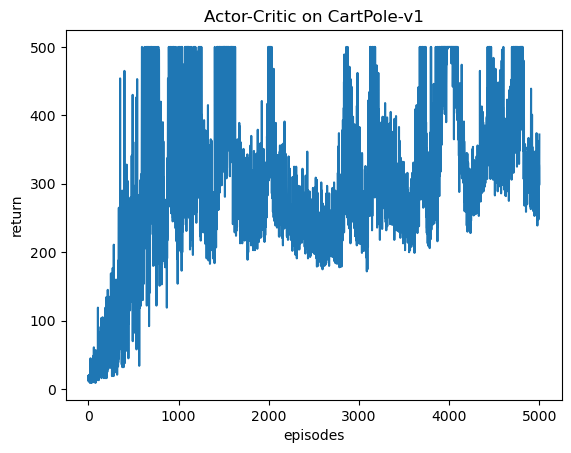

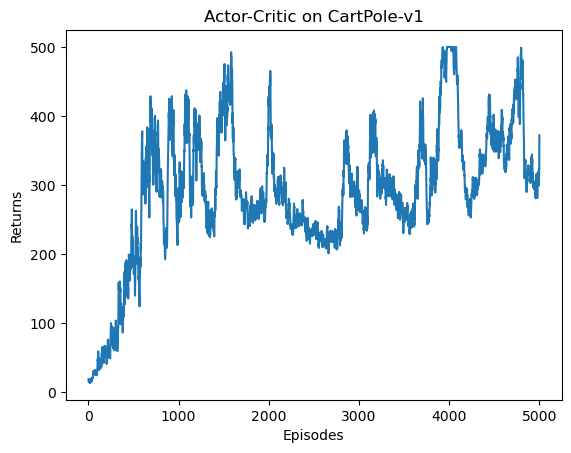

In [6]:
episodes_list=list(range(len(return_list)))
plt.plot(episodes_list,return_list)
plt.xlabel('episodes')
plt.ylabel('return')
plt.title("Actor-Critic on {}".format(env_name))
plt.show()
mv_return = mylab.moving_average(return_list, 9)
plt.plot(episodes_list, mv_return)
plt.xlabel('Episodes')
plt.ylabel('Returns')
plt.title('Actor-Critic on {}'.format(env_name))
plt.show()

In [13]:
def sample_expert_data(n_episode):
    states = []
    actions = []
    for episode in range(n_episode):
        state = env.reset()[0]
        done = False
        while not done:
            action = agent.take_action(state)
            states.append(state)
            actions.append(action)
            next_state, reward, done, _,_ = env.step(action)
            state = next_state
    return np.array(states), np.array(actions)



torch.manual_seed(0)
random.seed(0)
n_episode = 1
expert_s, expert_a = sample_expert_data(n_episode)
data = np.column_stack((expert_s, expert_a))
# 获取合并后的数据的形状
data_shape = data.shape

# 保存合并后的数据及其形状为文本文件
np.savetxt('expert_data.txt', data, delimiter=',', header=str(data_shape), comments='')